# Lista 3 - Mineração de Dados

In [ ]:
! pip install anaconda
! pip install plotnine
! pip install duckdb
! pip install scikit-learn
! pip install seaborn

## item a) Leitura do Dataset: 

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from plotnine import *
from sklearn import preprocessing
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import duckdb

In [ ]:
arquivo = pd.read_csv('fakeTelegram.BR_2022.csv')
arquivo

date_message               id_member_anonymous  \
0       2022-10-05 06:25:04  1078cc958f0febe28f4d03207660715f   
1       2022-10-05 06:25:08                               NaN   
2       2022-10-05 06:26:28  92a2d8fd7144074f659d1d29dc3751da   
3       2022-10-05 06:27:28  d60aa38f62b4977426b70944af4aff72   
4       2022-10-05 06:27:44  cd6979b0b5265f08468fa1689b6300ce   
...                     ...                               ...   
557581  2022-11-11 12:06:15  333e9869f23dbd4682d1be382d9c1e59   
557582  2022-11-11 12:09:08                               NaN   
557583  2022-11-11 12:09:47                               NaN   
557584  2022-11-11 12:09:46                               NaN   
557585  2022-11-11 12:09:48                               NaN   

                      id_group_anonymous  \
0       12283e08a2eb5789201e105b34489ee7   
1       12283e08a2eb5789201e105b34489ee7   
2       9f2d7394334eb224c061c9740b5748fc   
3       c8f2de56550ed0bf85249608b7ead93d   
4       e56ec342fc599ebb4ed89655eb6f03aa   
...                                  ...   
557581  e56ec342fc599ebb4ed89655eb6f03aa   
557582  5b10d7739171149be6d9961e3350c071   
557583  1590a03f43b5ba4b6147a1c5e1dd357b   
557584  5b10d7739171149be6d9961e3350c071   
557585  b11f2df64ac19aad47a50accf32052d6   

                                       media media_type  \
0                                        NaN        NaN   
1                                        NaN        NaN   
2                                        NaN        NaN   
3       94dca4cda503100ebfda7ce2bcc060eb.jpg  image/jpg   
4       5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg  image/jpg   
...                                      ...        ...   
557581  25e43b6a58b848c43ad5b5f9e979822a.jpg        url   
557582  657949d03e4088f6b332e2686ccd3221.jpg        url   
557583  a21848a61045380a6483866daed0ca0e.jpg  image/jpg   
557584  a21848a61045380a6483866daed0ca0e.jpg  image/jpg   
557585  a21848a61045380a6483866daed0ca0e.jpg  image/jpg   

                                                media_url  has_media  \
0                                                     NaN      False   
1                                                     NaN      False   
2                                                     NaN      False   
3                                                     NaN       True   
4                                                     NaN       True   
...                                                   ...        ...   
557581  https://terrabrasilnoticias.com/2022/11/bndes-...       True   
557582                       https://youtu.be/8g1Vz9_0xVk       True   
557583                           https://t.me/vemprasruas       True   
557584                           https://t.me/vemprasruas       True   
557585                           https://t.me/vemprasruas       True   

        has_media_url  trava_zap  \
0               False      False   
1               False      False   
2               False      False   
3               False      False   
4               False      False   
...               ...        ...   
557581           True      False   
557582           True      False   
557583           True      False   
557584           True      False   
557585           True      False   

                                   text_content_anonymous  dataset_info_id  \
0       Então é Fato Renato o áudio que eu ouvi no wha...                5   
1       Saiu no YouTube do presidente a 8 horas atrás,...                5   
2       É isso, nossa parte já foi quase toda feita. N...                5   
3                GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA                5   
4                                                     NaN                5   
...                                                   ...              ...   
557581  BNDES tem lucro de R$ 9,6 bilhões no terceiro ...                5   
557582                       https://youtu.be/8g1Vz9_0xVk                5

## item b) Removendo trava-zaps: 

In [193]:
#removendo trava-zap
arquivo = arquivo[arquivo['trava_zap'] != 1]

## item c) Removendo linhas duplicadas: 

In [186]:
arquivo = arquivo[arquivo.duplicated() == False]
arquivo.shape

(557570, 19)

## item d) Removendo entradas com textos menores do que 5 palavras: 

In [ ]:
#texto com menos de 5 palavra

arquivo = arquivo[arquivo['text_content_anonymous'].str.split().str.len()>=5]
arquivo.shape

(339286, 19)

## item e) Medidas para atributos numéricos: 

### e.1) Tendencia central: 

In [195]:
media_score_sentiment = arquivo['score_sentiment'].mean()
mediana_score_sentiment = arquivo['score_sentiment'].median()
moda_score_sentiment = arquivo['score_sentiment'].mode()

print(f"Média do score de sentimento: {media_score_sentiment:.2f}")
print(f"Mediana do score de sentimento: {mediana_score_sentiment:.2f}")
print(f"Moda do score de sentimento: {moda_score_sentiment[0]:.2f}")



Média do score de sentimento: 0.02
Mediana do score de sentimento: 0.00
Moda do score de sentimento: 0.00


In [196]:
media_score_misinfo = arquivo['score_misinformation'].mean()
mediana_score_misinfo = arquivo['score_misinformation'].median()
moda_score_misinfo = arquivo['score_misinformation'].mode()

print(f"Score Misinformation - Média  : {media_score_misinfo:.2f}")
print(f"Score Misinformation - Mediana: {mediana_score_misinfo:.2f}")
print(f"Score Misinformation - Moda   : {moda_score_misinfo[0]:.2f}")


Score Misinformation - Média  : 0.31
Score Misinformation - Mediana: 0.20
Score Misinformation - Moda   : 0.11


### e.2) Variabilidade: 

In [197]:
std_score_sentiment = arquivo['score_sentiment'].std()
var_score_sentiment = arquivo['score_sentiment'].var()
range_score_sentiment = arquivo['score_sentiment'].max() - arquivo['score_sentiment'].min()

print(f"Score Sentiment       - Desvio Padrão: {std_score_sentiment:.2f}")
print(f"Score Sentiment       - Variância    : {var_score_sentiment:.2f}")
print(f"Score Sentiment       - Amplitude    : {range_score_sentiment:.2f}")

Score Sentiment       - Desvio Padrão: 0.53
Score Sentiment       - Variância    : 0.28
Score Sentiment       - Amplitude    : 2.00


In [198]:
std_score_misinfo = arquivo['score_misinformation'].std()
var_score_misinfo = arquivo['score_misinformation'].var()
range_score_misinfo = arquivo['score_misinformation'].max() - arquivo['score_misinformation'].min()

print(f"Score Misinformation - Desvio Padrão: {std_score_misinfo:.2f}")
print(f"Score Misinformation - Variância    : {var_score_misinfo:.2f}")
print(f"Score Misinformation - Amplitude    : {range_score_misinfo:.2f}")

Score Misinformation - Desvio Padrão: 0.29
Score Misinformation - Variância    : 0.09
Score Misinformation - Amplitude    : 1.00


### e.3) Tabelas e Histogramas:

In [11]:
def hist_plot(df, coluna, titulo):
    plot = (
        ggplot(df, aes(x=coluna)) +
        geom_histogram(bins=10, fill="#69b3a2", color="black", alpha=0.7) +
        labs(title=titulo, x=coluna, y='Frequência') +
        theme_minimal()
    )
    return plot

In [12]:
frequencia_sentiment = pd.cut(arquivo['score_sentiment'], bins=10).value_counts().sort_index()
frequencia_sentiment


score_sentiment
(-1.002, -0.8]     25619
(-0.8, -0.6]       28015
(-0.6, -0.4]       30316
(-0.4, -0.2]       25150
(-0.2, -0.0004]    18427
(-0.0004, 0.2]     87933
(0.2, 0.399]       22792
(0.399, 0.599]     42711
(0.599, 0.799]     26973
(0.799, 0.999]     28960
Name: count, dtype: int64

C:\Users\iuri_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_bin : Removed 48 rows containing non-finite values.


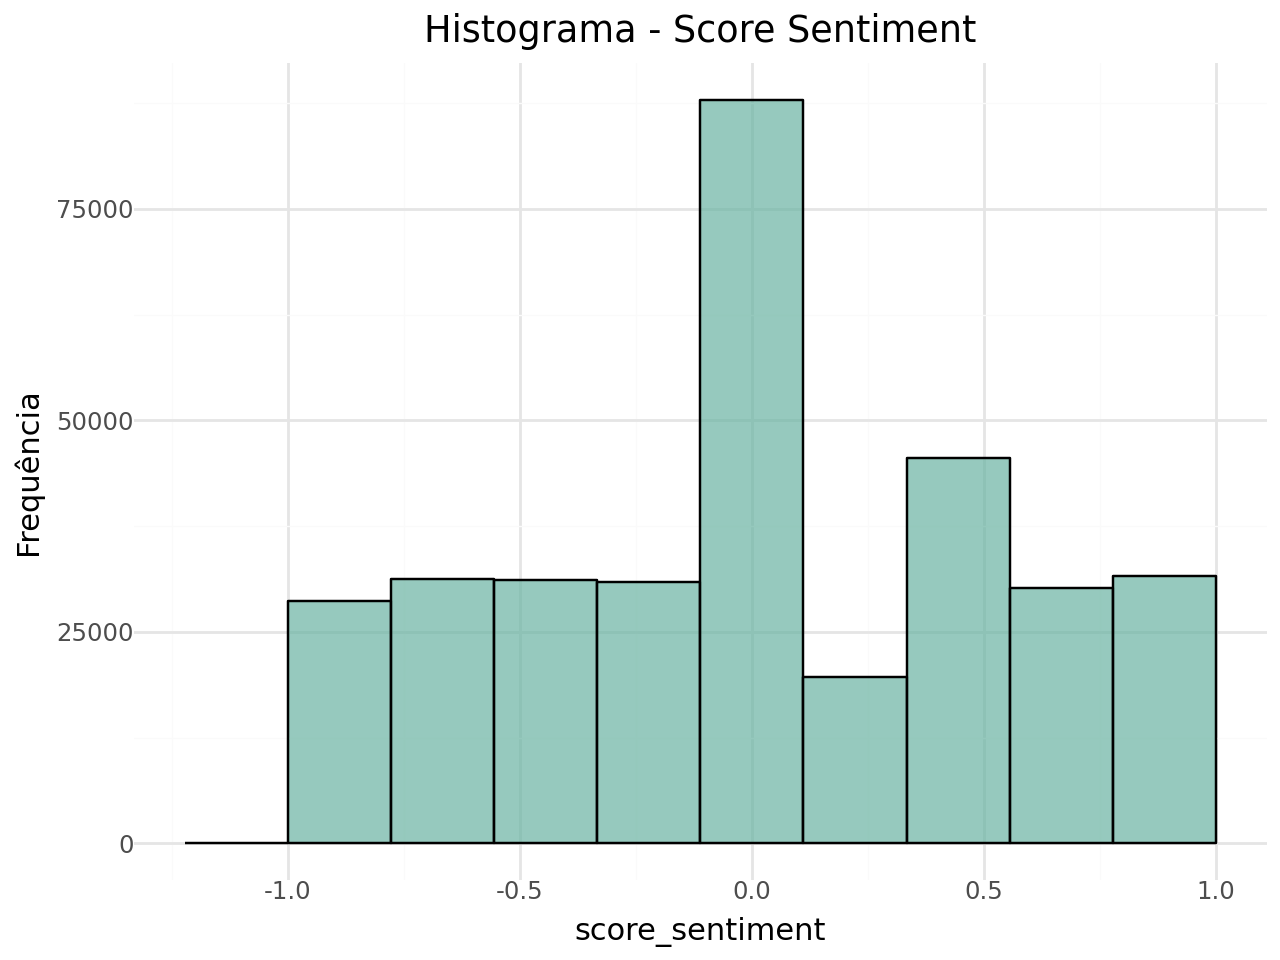

In [13]:
plot_sentiment = hist_plot(arquivo, 'score_sentiment', 'Histograma - Score Sentiment')
plot_sentiment

In [14]:
frequencia_misinfo = pd.cut(arquivo['score_misinformation'], bins=10).value_counts().sort_index()
frequencia_misinfo

score_misinformation
(-0.000997, 0.1]    51140
(0.1, 0.2]          33040
(0.2, 0.3]          19169
(0.3, 0.4]          12834
(0.4, 0.5]          10083
(0.5, 0.6]           8510
(0.6, 0.7]           7656
(0.7, 0.8]           6808
(0.8, 0.9]           6371
(0.9, 1.0]          11575
Name: count, dtype: int64

C:\Users\iuri_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_bin : Removed 169758 rows containing non-finite values.


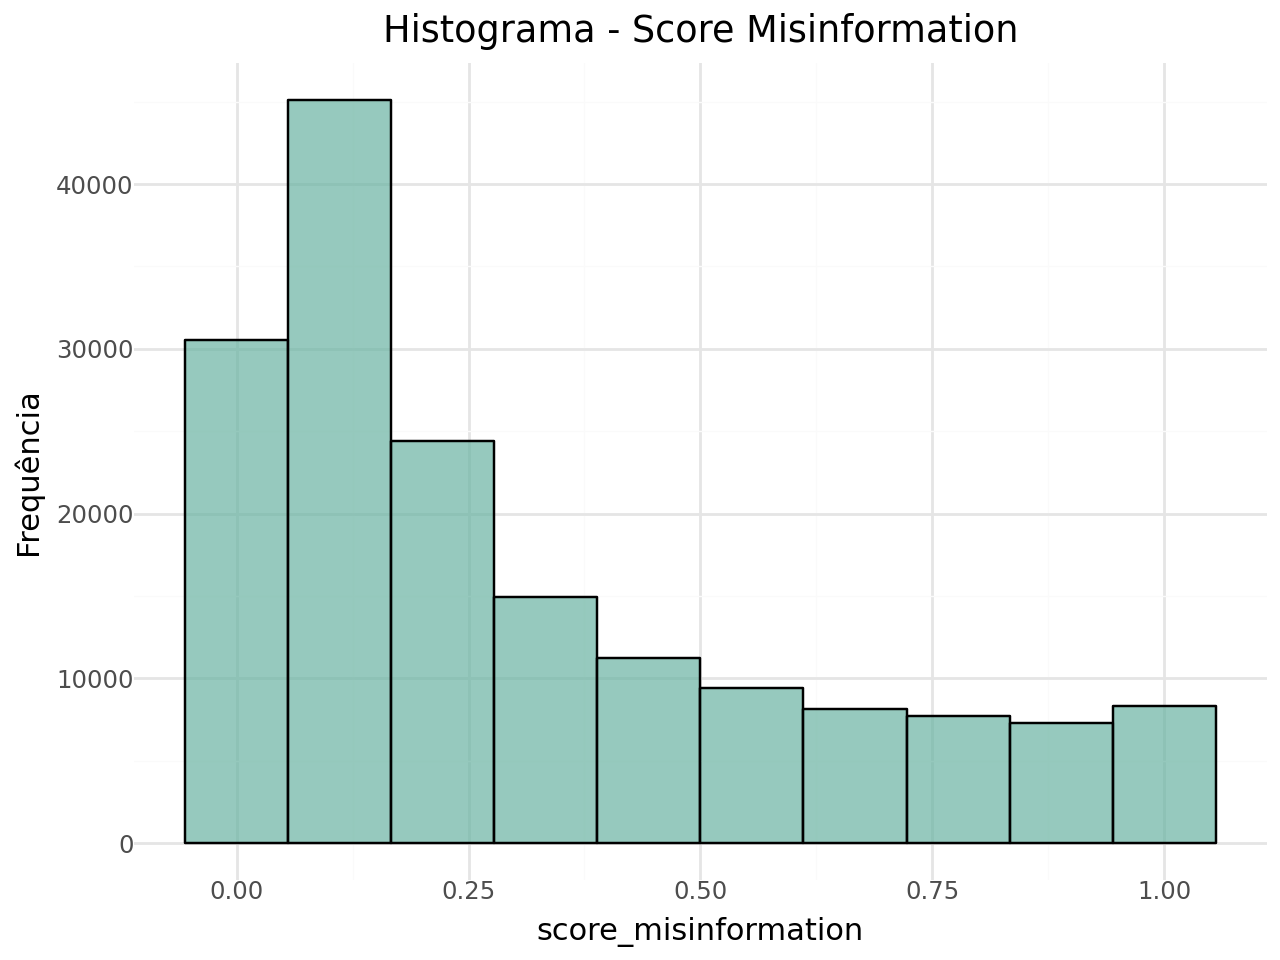

In [15]:
plot_misinfo = hist_plot(arquivo, 'score_misinformation', 'Histograma - Score Misinformation')
plot_misinfo

### e.4) Boxplot:

In [16]:
def boxplot_plot(df, coluna, titulo):
    plot = (
        ggplot(df, aes(x='""', y=coluna)) +  # x vazio para plot vertical
        geom_boxplot(fill="#ffa07a", color="black") +
        labs(title=titulo, x='', y=coluna) +
        theme_minimal()
    )
    return plot

C:\Users\iuri_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_boxplot : Removed 48 rows containing non-finite values.


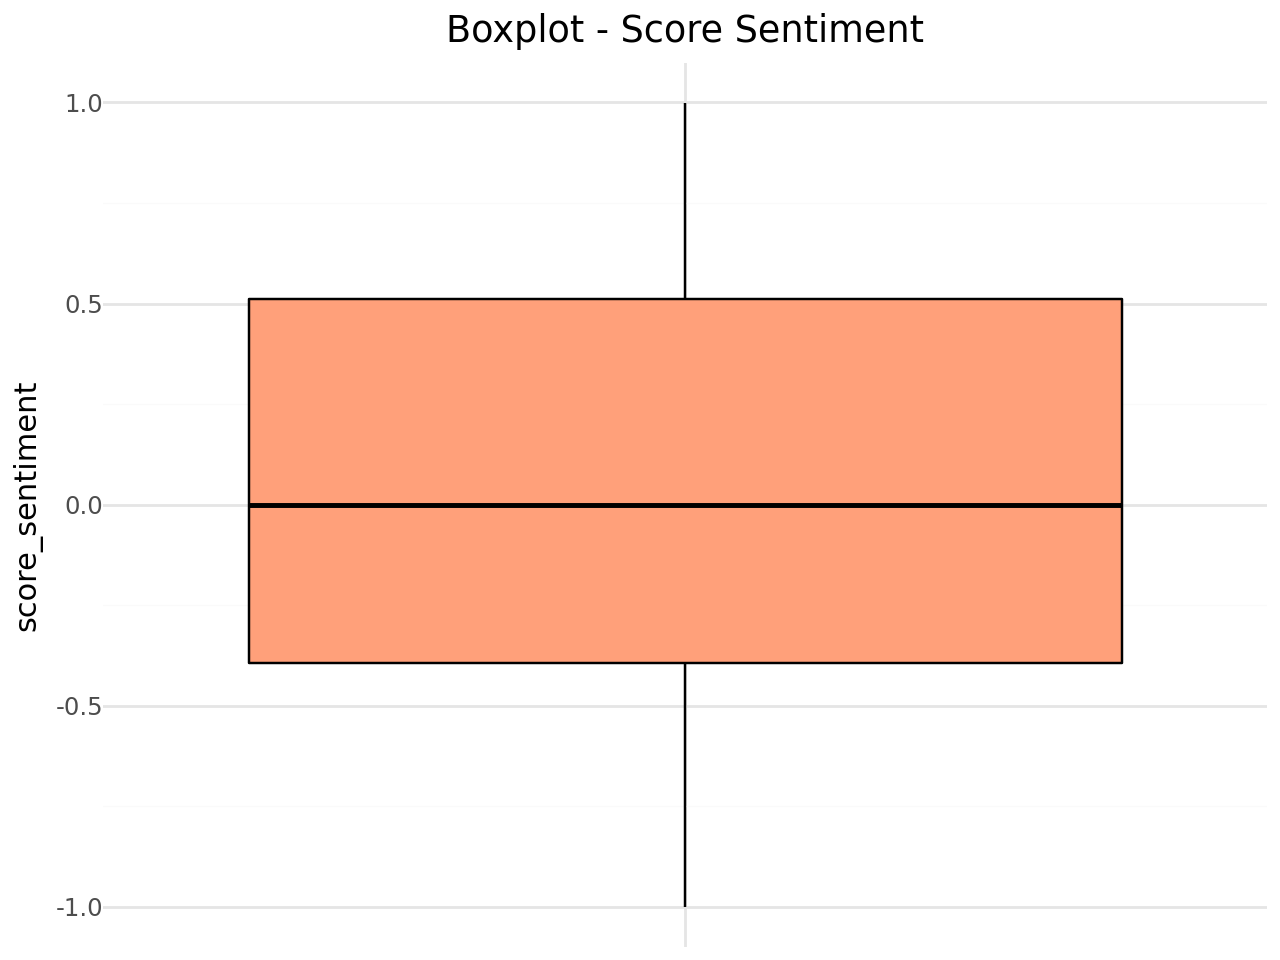

In [17]:
boxplot_sentiment = boxplot_plot(arquivo, 'score_sentiment', 'Boxplot - Score Sentiment')
boxplot_sentiment

C:\Users\iuri_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_boxplot : Removed 169758 rows containing non-finite values.


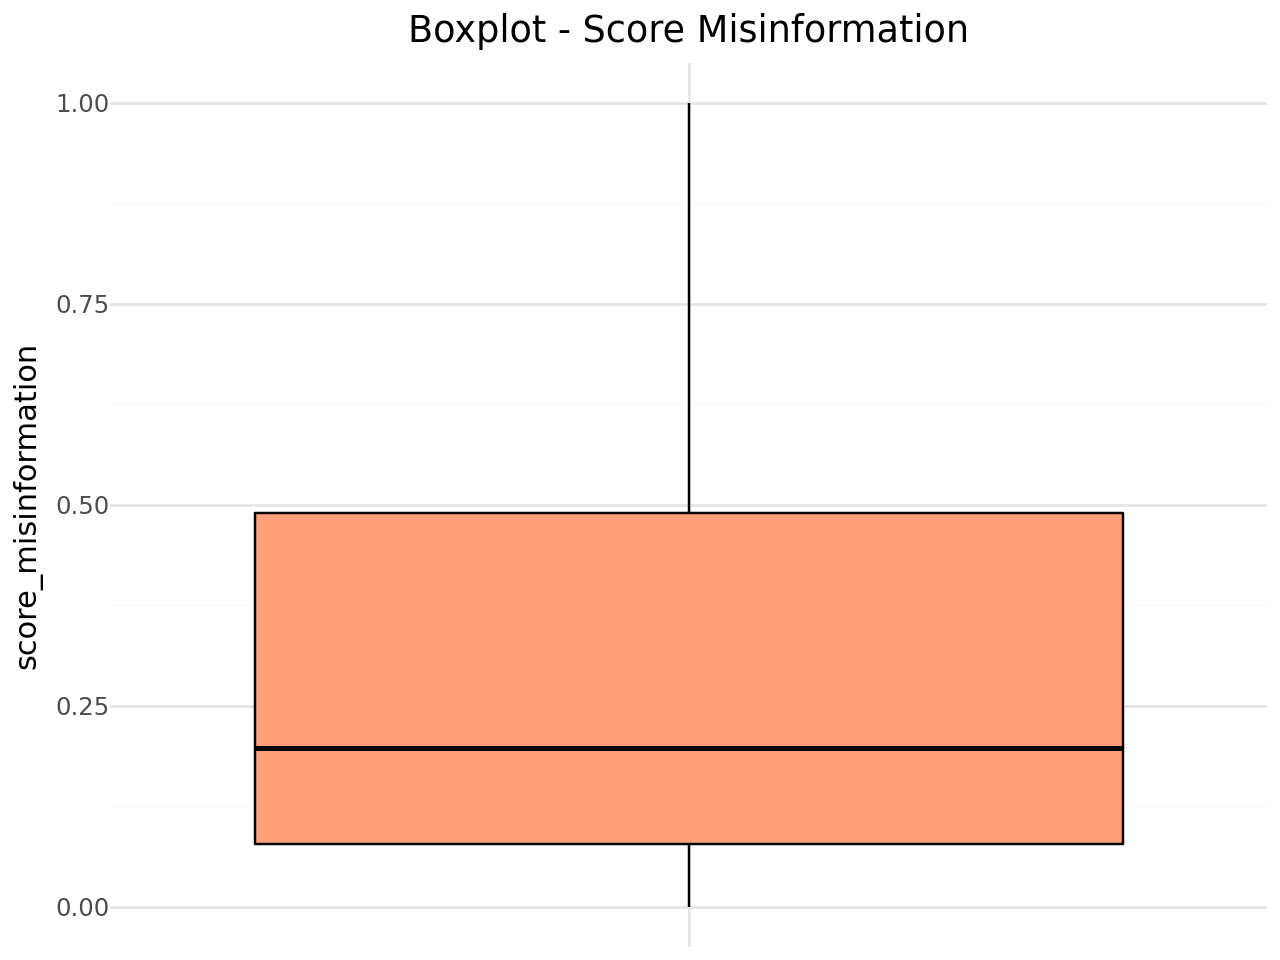

In [18]:
boxplot_misinfo = boxplot_plot(arquivo, 'score_misinformation', 'Boxplot - Score Misinformation')
boxplot_misinfo

### e.5) QQ-Plot: 

In [19]:
def get_qq_data(series):
    series = series.dropna()
    quantis_teoricos = stats.norm.ppf(np.linspace(0.01, 0.99, len(series)))
    quantis_empiricos = np.sort(series.values)
    return pd.DataFrame({'Teorico': quantis_teoricos, 'Empirico': quantis_empiricos})

qq_sentiment_df = get_qq_data(arquivo['score_sentiment'])
qq_misinfo_df = get_qq_data(arquivo['score_misinformation'])



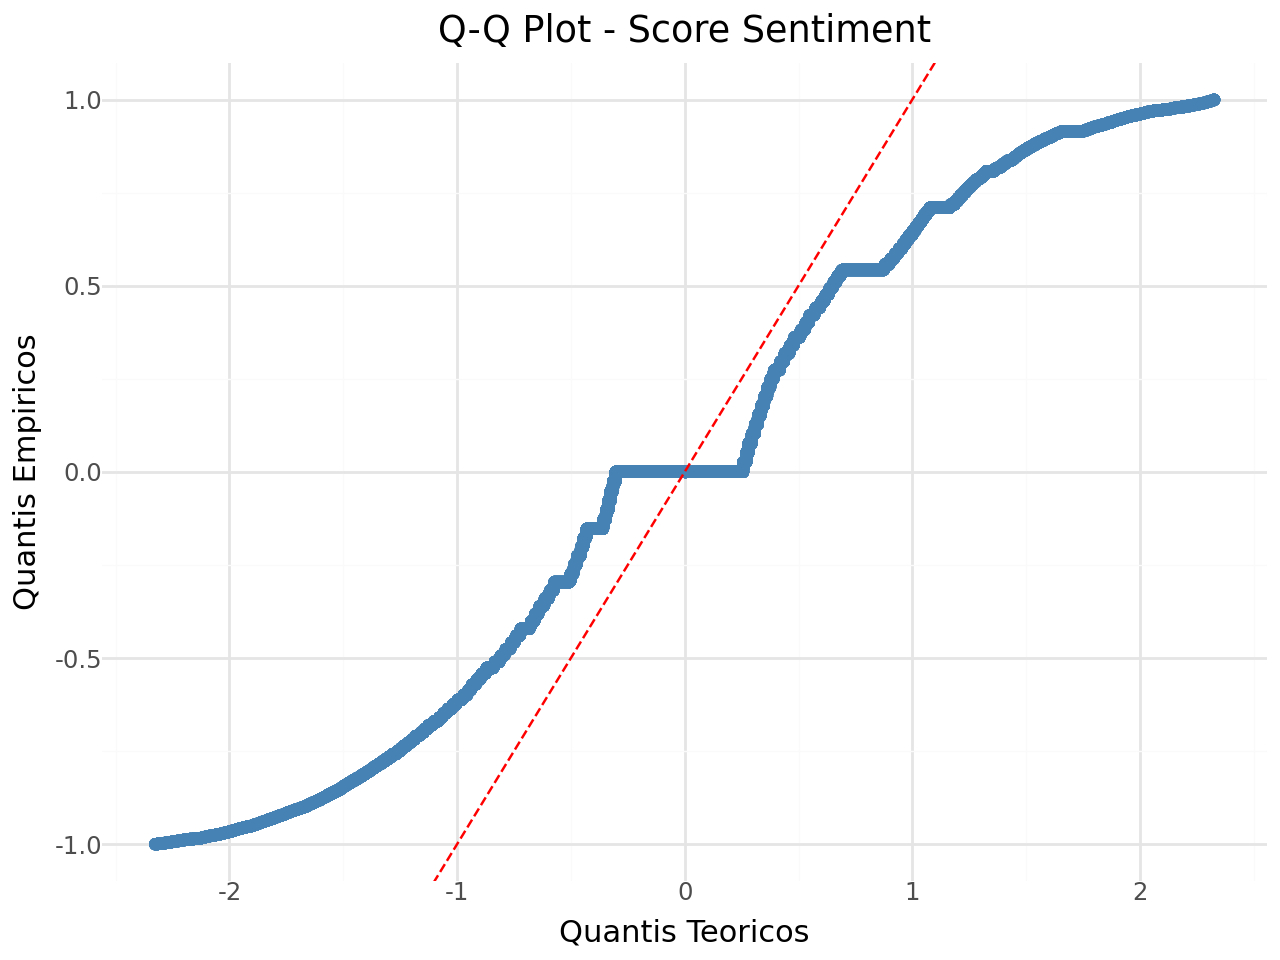

In [20]:
qqplot_sentiment = (
    ggplot(qq_sentiment_df, aes(x='Teorico', y='Empirico')) +
    geom_point(color='steelblue') +
    geom_abline(intercept=0, slope=1, linetype='dashed', color='red') +
    labs(title='Q-Q Plot - Score Sentiment', x='Quantis Teoricos', y='Quantis Empiricos') +
    theme_minimal()
)

qqplot_sentiment

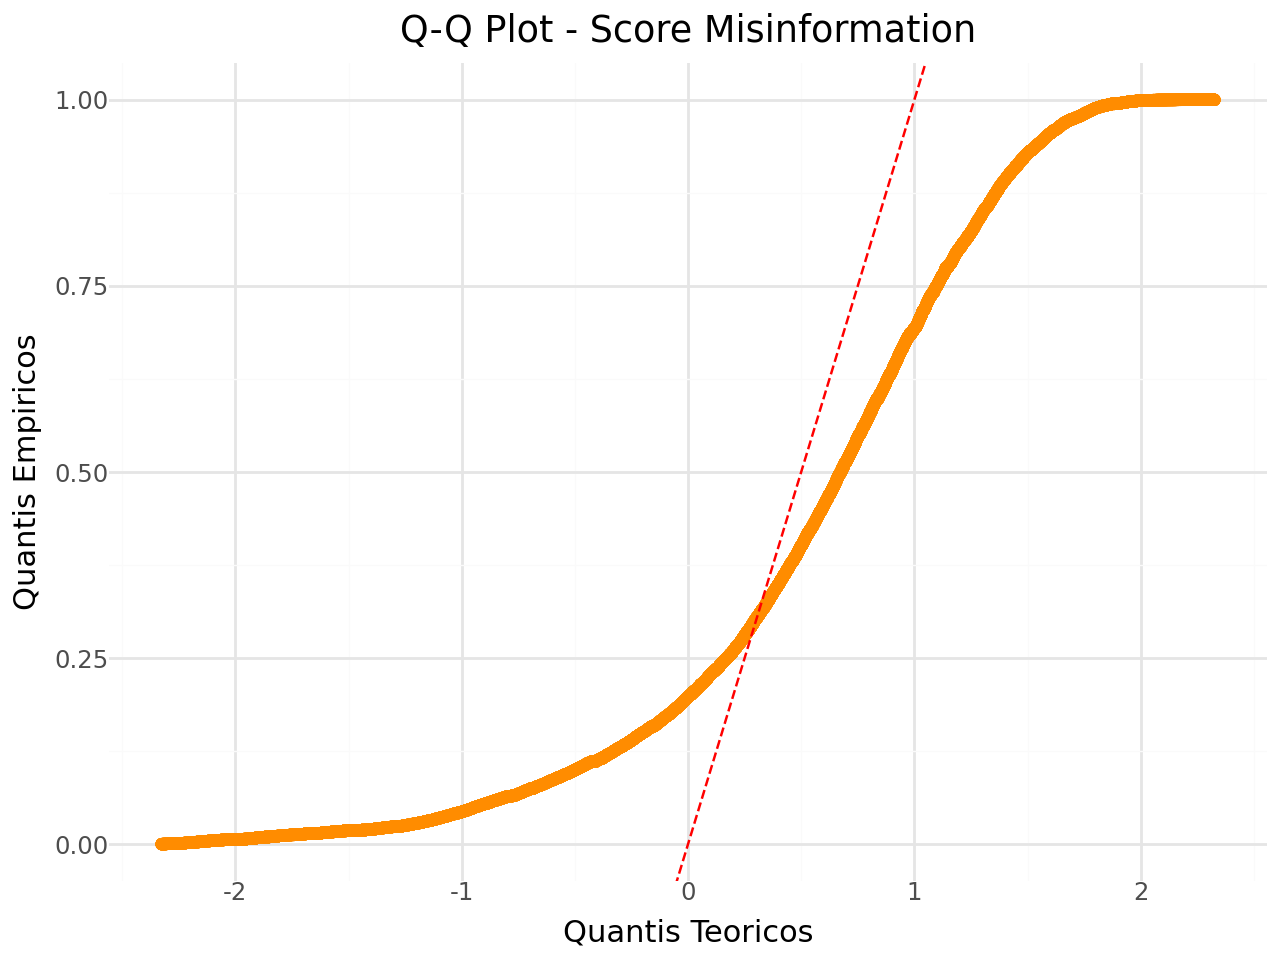

In [21]:
qqplot_misinfo = (
    ggplot(qq_misinfo_df, aes(x='Teorico', y='Empirico')) +
    geom_point(color='darkorange') +
    geom_abline(intercept=0, slope=1, linetype='dashed', color='red') +
    labs(title='Q-Q Plot - Score Misinformation', x='Quantis Teoricos', y='Quantis Empiricos') +
    theme_minimal()
)

qqplot_misinfo

### e.6) Teste de normalidade: 

In [22]:
score_sentiment = arquivo['score_sentiment'].dropna()
score_misinformation = arquivo['score_misinformation'].dropna()
sentiment_z = stats.zscore(score_sentiment)
misinfo_z = stats.zscore(score_misinformation)

ks_sentiment = stats.kstest(sentiment_z, 'norm')
ks_misinfo = stats.kstest(misinfo_z, 'norm')

# Exibir os resultados
print("Kolmogorov-Smirnov - Score Sentiment:")
print(f"  Estatística: {ks_sentiment.statistic}, p-valor: {ks_sentiment.pvalue}")

print("\nKolmogorov-Smirnov - Score Misinformation:")
print(f"  Estatística: {ks_misinfo.statistic}, p-valor: {ks_misinfo.pvalue}")

Kolmogorov-Smirnov - Score Sentiment:
  Estatística: 0.11955561381387086, p-valor: 0.0

Kolmogorov-Smirnov - Score Misinformation:
  Estatística: 0.1556465092975164, p-valor: 0.0


### e.7) Best Fit: 

In [23]:
dist_names = ['beta',
              'expon',
              'gamma',
              'lognorm',
              'norm',
              'pearson3',
              't',
              'triang',
              'uniform',
              'weibull_min', 
              'weibull_max']

def check_distribution(dist_names, y_std):
    
    p_values = []
    distance = []
    D_less_p = []
    
    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(stats, distribution)
        param = dist.fit(y_std)

        if distribution != "norm":
            D, p = stats.kstest(y_std, distribution, args=param)
        else:
            D, p = stats.kstest(y_std, distribution,  alternative='greater')
            
        #p = np.around(p, 5)
        p_values.append(p)    
        
        #D = np.around(D, 5)
        distance.append(D)    
        
        if D<p: 
            D_less_p.append("yes") 
        else: 
            D_less_p.append("no")

    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['Distance'] = distance
    results['p_value'] = p_values
    results['D<p'] = D_less_p
    
    results.sort_values(['p_value'], ascending=False, inplace=True)


    print ('\nDistributions sorted by goodness of fit:')
    print ('----------------------------------------')
    print (results)


check_distribution(dist_names, sentiment_z)

C:\Users\iuri_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_continuous_distns.py:6912: RuntimeWarning: invalid value encountered in log



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance  p_value D<p
0          beta  0.116231      0.0  no
1         expon  0.245569      0.0  no
2         gamma  0.116837      0.0  no
3       lognorm  0.117614      0.0  no
4          norm  0.119556      0.0  no
5      pearson3  0.130156      0.0  no
6             t  0.119556      0.0  no
7        triang  0.141003      0.0  no
8       uniform  0.121665      0.0  no
9   weibull_min  0.113071      0.0  no
10  weibull_max  0.142185      0.0  no


In [24]:
check_distribution(dist_names, misinfo_z)

C:\Users\iuri_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_continuous_distns.py:795: RuntimeWarning: invalid value encountered in sqrt
C:\Users\iuri_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_continuous_distns.py:6912: RuntimeWarning: invalid value encountered in log



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
2         gamma  0.046656  1.066425e-316  no
5      pearson3  0.046709  2.061097e-317  no
0          beta  0.107219   0.000000e+00  no
1         expon  0.048725   0.000000e+00  no
3       lognorm  0.068527   0.000000e+00  no
4          norm  0.155647   0.000000e+00  no
6             t  0.155647   0.000000e+00  no
7        triang  0.175760   0.000000e+00  no
8       uniform  0.321872   0.000000e+00  no
9   weibull_min  0.047393   0.000000e+00  no
10  weibull_max  0.114705   0.000000e+00  no


## item f) Correlação:

In [25]:
sentiment_to_misinfo = arquivo['score_sentiment'][arquivo['score_misinformation'].notnull()]

In [26]:
spearmanr_corr = stats.spearmanr(sentiment_to_misinfo, score_misinformation)
spearmanr_corr

SignificanceResult(statistic=-0.38851604918922816, pvalue=0.0)

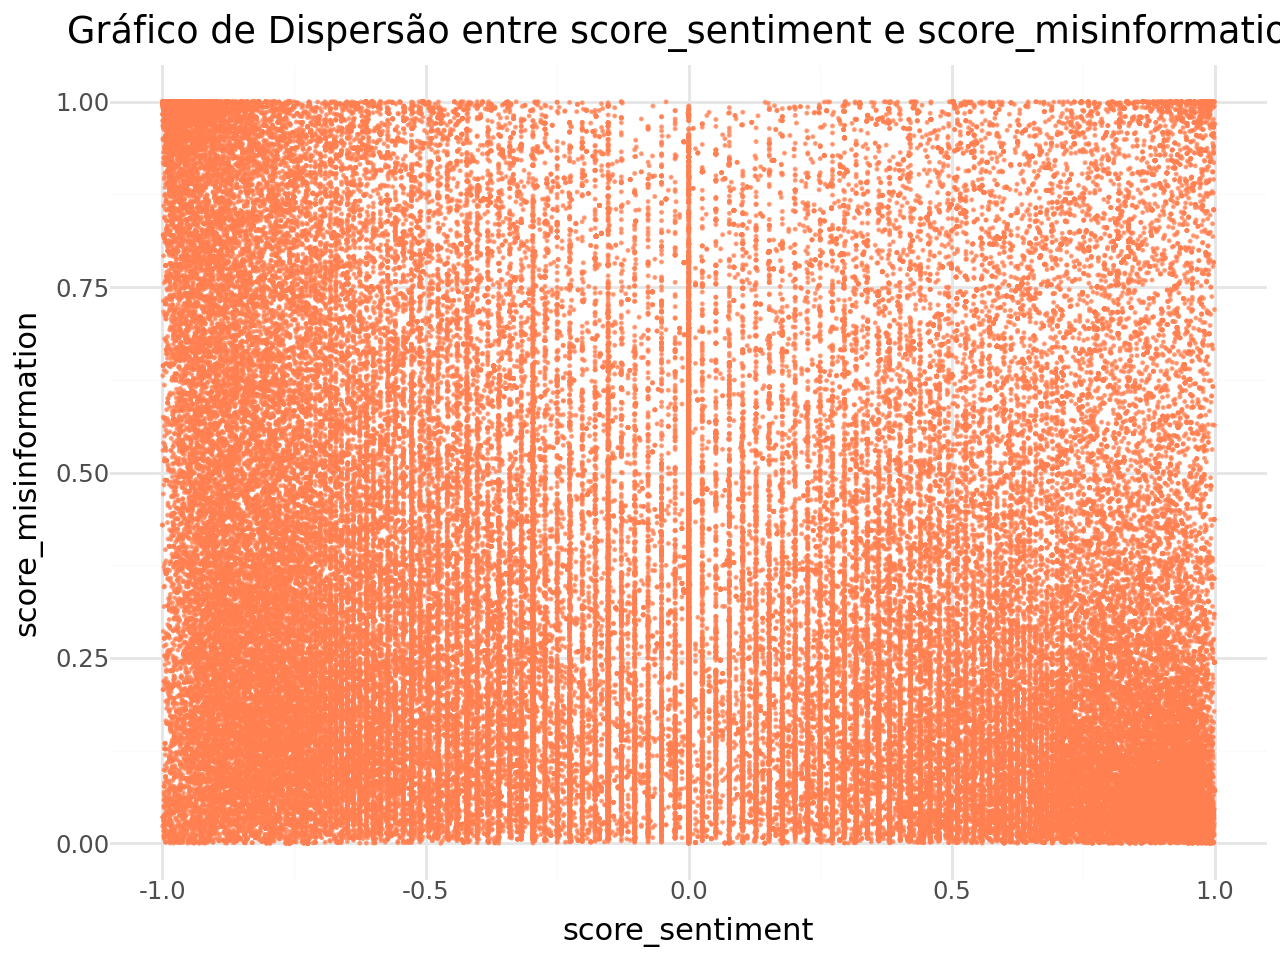

In [27]:
df_plot = pd.DataFrame({'x': sentiment_to_misinfo, 'y': score_misinformation})
(
    ggplot(df_plot, aes(x='sentiment_to_misinfo', y='score_misinformation')) +
    geom_point(color='coral', alpha=0.7, size=0.005) +
    labs(
        title='Gráfico de Dispersão entre score_sentiment e score_misinformation',
        x='score_sentiment',
        y='score_misinformation'
    ) +
    theme_minimal()
)

## item g) V de Cramer: 

In [28]:
data = arquivo[[i for i in arquivo.columns if i in ('media_type', 'has_media', 'has_media_url', 'trava-zap', 'message_type')]]

data.head()

media_type  has_media  has_media_url message_type
0        NaN      False          False        Texto
1        NaN      False          False        Texto
2        NaN      False          False        Texto
3  image/jpg       True          False       Imagem
5        NaN      False          False        Texto

In [29]:
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in data.columns :
  data_encoded[i]=label.fit_transform(data[i])

data_encoded.head()

media_type  has_media  has_media_url  message_type
0          41          0              0             5
1          41          0              0             5
2          41          0              0             5
3          21          1              0             3
4          41          0              0             5

In [30]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [31]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

df

media_type  has_media  has_media_url  message_type
media_type           1.00       1.00           0.47          0.87
has_media            1.00       1.00           0.23          1.00
has_media_url        0.47       0.23           1.00          0.47
message_type         0.87       1.00           0.47          1.00

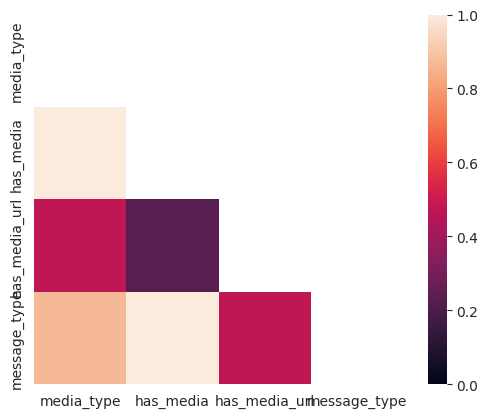

In [32]:
mask = np.zeros_like(df, dtype=bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()


## item h) Visualizações gerais: 

In [199]:
#EXPORTANDO PARA PARQUET
arquivo.to_parquet('fakeTelegram3.parquet')

In [4]:
#LENDO O ARQUIVO PARQUET
arquivo = pd.read_parquet('fakeTelegram3.parquet')
arquivo.head()

date_message               id_member_anonymous  \
0  2022-10-05 06:25:04  1078cc958f0febe28f4d03207660715f   
1  2022-10-05 06:25:08                              None   
2  2022-10-05 06:26:28  92a2d8fd7144074f659d1d29dc3751da   
3  2022-10-05 06:27:28  d60aa38f62b4977426b70944af4aff72   
5  2022-10-05 06:28:30                              None   

                 id_group_anonymous                                 media  \
0  12283e08a2eb5789201e105b34489ee7                                  None   
1  12283e08a2eb5789201e105b34489ee7                                  None   
2  9f2d7394334eb224c061c9740b5748fc                                  None   
3  c8f2de56550ed0bf85249608b7ead93d  94dca4cda503100ebfda7ce2bcc060eb.jpg   
5  b52442a5fbc459ae590dca0d215e32f9                                  None   

  media_type media_url  has_media  has_media_url  trava_zap  \
0       None      None      False          False      False   
1       None      None      False          False      False   
2       None      None      False          False      False   
3  image/jpg      None       True          False      False   
5       None      None      False          False      False   

                              text_content_anonymous  dataset_info_id  \
0  Então é Fato Renato o áudio que eu ouvi no wha...                5   
1  Saiu no YouTube do presidente a 8 horas atrás,...                5   
2  É isso, nossa parte já foi quase toda feita. N...                5   
3           GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA                5   
5  Kķkkkkk to rindo até agora....Quem disse q ia ...                5   

                  date_system  score_sentiment  score_misinformation  \
0  2022-10-05 06:25:28.863641           0.0000                   NaN   
1  2022-10-05 06:25:28.926311           0.0644                   NaN   
2  2022-10-05 06:26:29.361949          -0.3551              0.157242   
3  2022-10-05 06:27:29.935624           0.0000                   NaN   
5  2022-10-05 06:29:29.046694           0.7003              0.197813   

   id_message message_type messenger media_name  \
0       16385        Texto  telegram       None   
1       16386        Texto  telegram       None   
2       16366        Texto  telegram       None   
3       19281       Imagem  telegram       None   
5        2735        Texto  telegram       None   

                          media_md5  
0                              None  
1                              None  
2                              None  
3  94dca4cda503100ebfda7ce2bcc060eb  
5                              None

In [5]:
#EXPORTANDO PARA DUCKDB
conn = duckdb.connect()
conn.register('telegram3', arquivo)

#### h.1) usuarios, mensagens e grupos

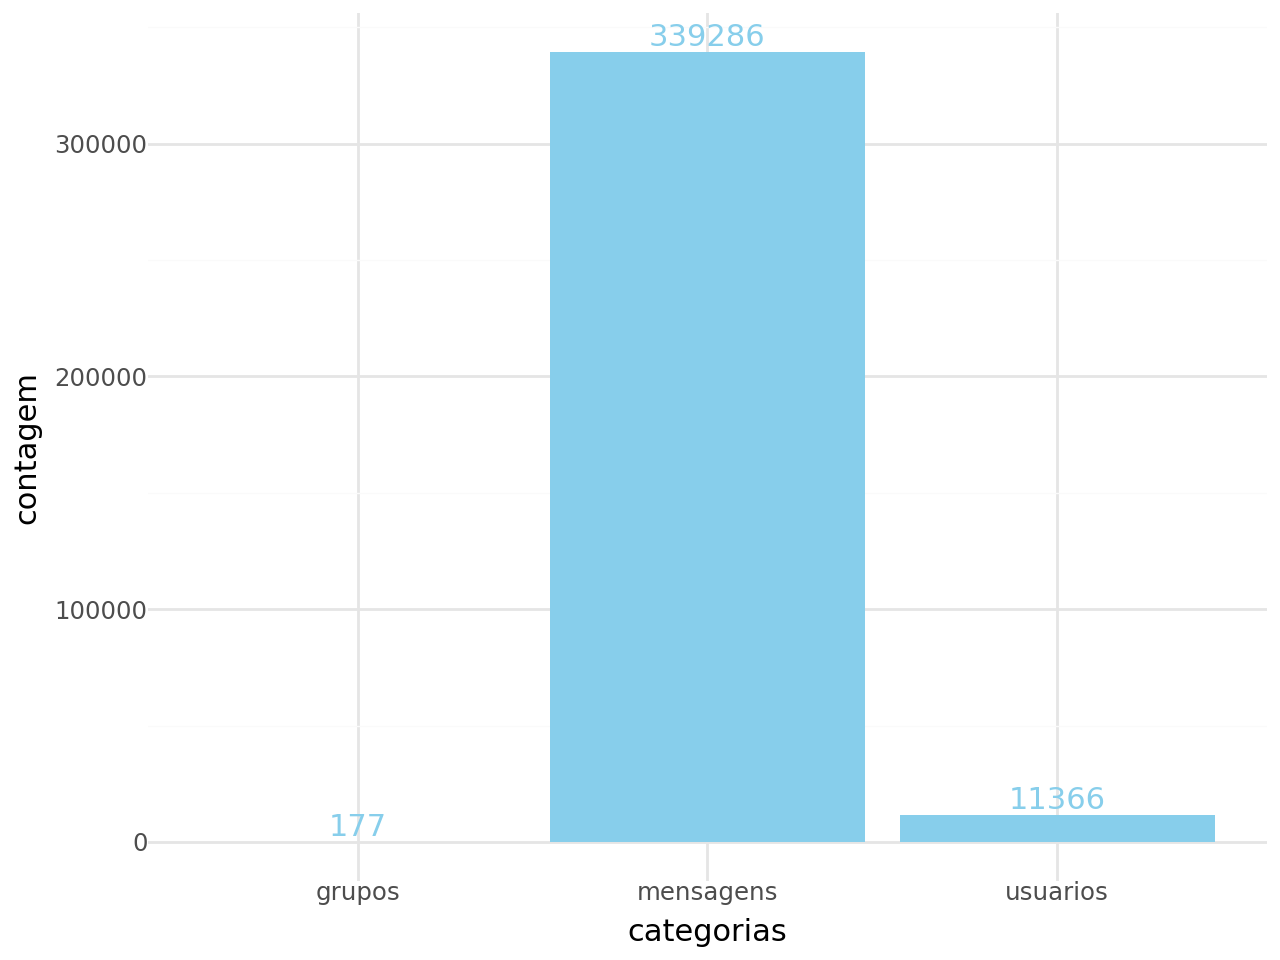

In [202]:
querry1 = conn.execute("""SELECT COUNT(id_message) AS mensagens, COUNT(DISTINCT id_member_anonymous) AS usuarios, COUNT(DISTINCT id_group_anonymous) AS grupos
                         FROM telegram3
                         """).fetchdf()

querry1_melted = pd.melt(querry1, var_name='categorias', value_name='contagem')
plot = (
    ggplot(querry1_melted, aes(x='categorias', y='contagem')) +
    geom_bar(stat='identity', fill= 'skyblue') +
    geom_text(aes(label='contagem'), va='bottom', format_string='{:.0f}', color = 'skyblue') +  # Labels on top
    theme_minimal()
)
plot

#### h.2) Texto X Midia: 

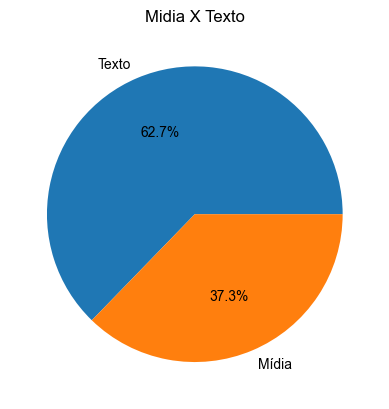

In [203]:
querry2 = conn.execute("""SELECT COUNT(message_type) AS quantidade
                          FROM telegram3
                          WHERE message_type = 'Texto'
                        """).fetchdf()
querry3 = conn.execute("""SELECT COUNT(message_type) AS quantidade
                          FROM telegram3
                          WHERE message_type != 'Texto'
                        """).fetchdf()

querry_united =pd.concat([querry2,querry3], ignore_index= True)
plt.pie(querry_united['quantidade'], labels = ['Texto','Mídia'],autopct='%1.1f%%')
plt.title('Midia X Texto')
plt.show()


#### h.3) Mensagens por tipo de mídia: 

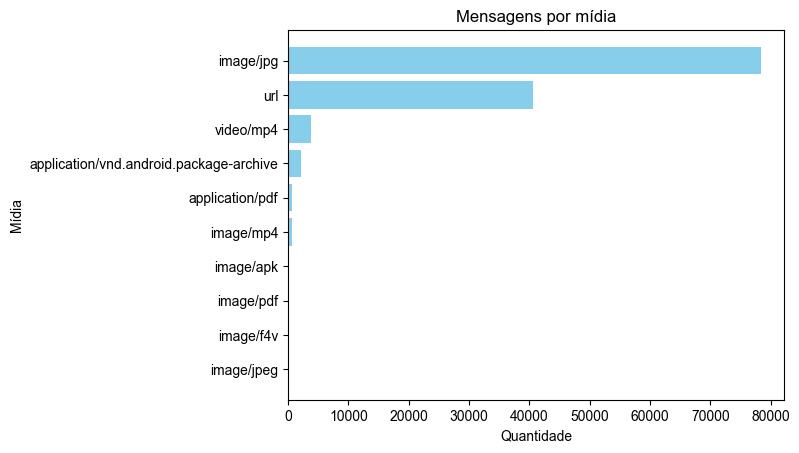

In [204]:
querry4 = conn.execute("""SELECT media_type, COUNT(id_message) AS quantidade
                          FROM telegram3
                          WHERE media_type IS NOT NULL
                          GROUP BY media_type ORDER BY quantidade DESC
                          LIMIT 10
                        """).fetchdf()

querry4 = querry4.sort_values('quantidade', ascending = True)
plt.barh(querry4['media_type'], querry4['quantidade'], color='skyblue')
plt.xlabel('Quantidade')
plt.ylabel('Mídia')
plt.title('Mensagens por mídia')
plt.show()

#### h.4) Quantidade de mensagens X quantidade de palavras

In [205]:
resultado = arquivo['text_content_anonymous'].str.split(' ').str.len()


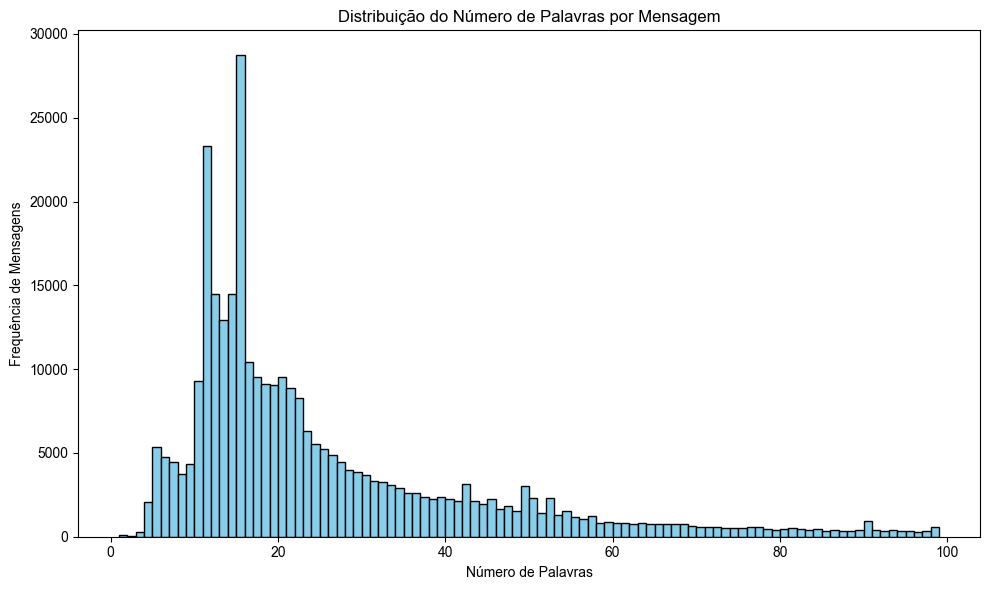

In [206]:
plt.figure(figsize=(10, 6))
plt.hist(resultado, bins=range(1, 100), color='skyblue', edgecolor='black')
plt.title('Distribuição do Número de Palavras por Mensagem')
plt.xlabel('Número de Palavras')
plt.ylabel('Frequência de Mensagens')
plt.tight_layout()
plt.show()


#### h.10) 30 URL's que mais se repetem:

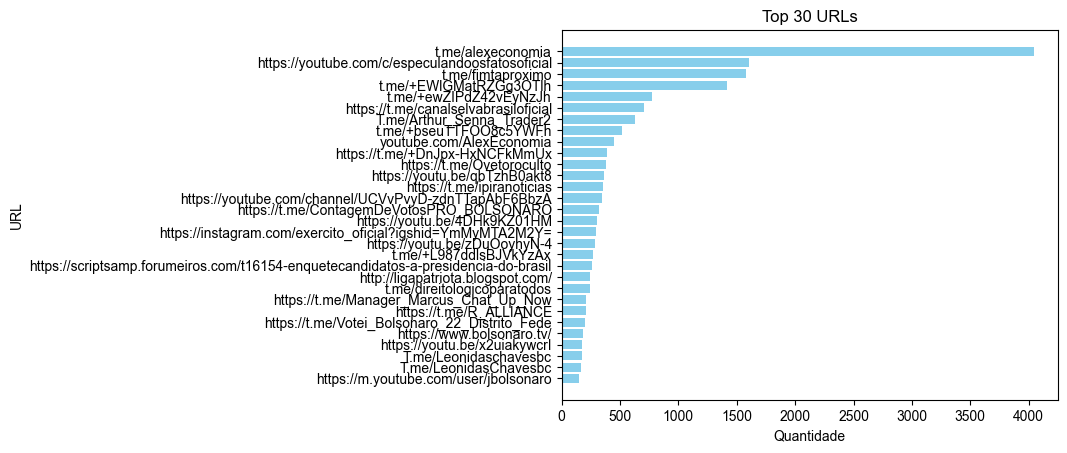

In [207]:
querry5 = conn.execute("""SELECT media_url, COUNT(media_url) AS quantidade
                          FROM telegram3
                          WHERE has_media_url = TRUE
                          GROUP BY media_url ORDER BY quantidade DESC LIMIT 30
                        """).fetchdf()

querry5 = querry5.sort_values('quantidade', ascending = True)
plt.barh(querry5['media_url'], querry5['quantidade'], color='skyblue')
plt.xlabel('Quantidade')
plt.ylabel('URL')
plt.title('Top 30 URLs')
plt.show()


#### h.11) Os 30 domínios que mais se repetem:

In [208]:
from urllib.parse import urlparse


def extract_domain(url):
    if pd.isna(url):
        return None
    if not url.startswith(('http://', 'https://')):
        url = 'http://' + url  # Add scheme if missing
    parsed = urlparse(url)
    domain = parsed.netloc.lower()
    if domain.startswith('www.'):
        domain = domain[4:]  # Remove www.
    return domain

arquivo['domain'] = arquivo['media_url'].apply(extract_domain)
conn.register('telegram', arquivo)
arquivo[arquivo['domain'].notnull()].head()

date_message               id_member_anonymous  \
9   2022-10-05 06:29:48  a7e85072244cae15446c9d517dc01a1a   
11  2022-10-05 06:32:21                              None   
16  2022-10-05 06:35:42  d49f81df0c75d1d72bee6c5b2d707da0   
38  2022-10-05 06:56:01                              None   
43  2022-10-05 07:00:45  a7e85072244cae15446c9d517dc01a1a   

                  id_group_anonymous media media_type  \
9   b8a8737812c7fd7d3e0bdbb65ef6306f  None       None   
11  2ff252ad4422e11a6a8abfaa747abb55  None       None   
16  e3988dfe85b2ba2fa0499a428dd8a20a  None       None   
38  0e899038fbe9196d404c90cf7ad282e0  None       None   
43  b8a8737812c7fd7d3e0bdbb65ef6306f  None       None   

                                          media_url  has_media  has_media_url  \
9             www.marketingdigitalparavencer.com.br      False           True   
11                                t.me/alexeconomia      False           True   
16  https://youtube.com/c/especulandoosfatosoficial      False           True   
38                           http://lulaflix.com.br      False           True   
43            www.marketingdigitalparavencer.com.br      False           True   

    trava_zap                             text_content_anonymous  \
9       False  O Deputado Federal pelo NOVO e que foi candida...   
11      False  Gazprom da Rússia: Retomamos o fornecimento de...   
16      False  🚨Olá SEJA bem vindo(a) ..- ao grupo Especuland...   
38      False  PT recorre ao TSE para tirar do ar site “LulaF...   
43      False  O Exército do Bem continua crescendo para venc...   

    dataset_info_id                 date_system  score_sentiment  \
9                 5  2022-10-05 06:29:49.901419          -0.8779   
11                5   2022-10-05 06:32:29.06454          -0.1531   
16                5  2022-10-05 06:35:49.661204           0.8074   
38                5  2022-10-05 06:56:30.615304           0.4710   
43                5  2022-10-05 07:00:46.306885          -0.9313   

    score_misinformation  id_message message_type messenger media_name  \
9               0.035876        7248        Texto  telegram       None   
11                   NaN       48922        Texto  telegram       None   
16              0.018574      451729        Texto  telegram       None   
38              0.629701        5759        Texto  telegram       None   
43              0.484808        7249        Texto  telegram       None   

   media_md5                             domain  
9       None  marketingdigitalparavencer.com.br  
11      None                               t.me  
16      None                        youtube.com  
38      None                    lulaflix.com.br  
43      None  marketingdigitalparavencer.com.br

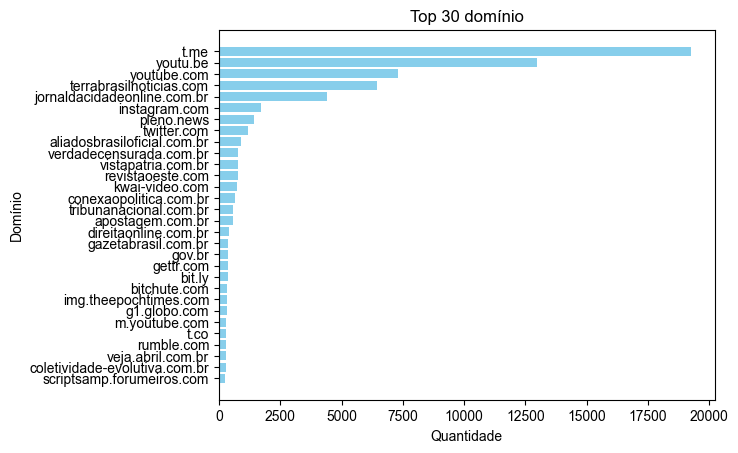

In [209]:
querry6 = conn.execute("""SELECT domain, COUNT(domain) AS quantidade
                          FROM telegram
                          WHERE has_media_url = TRUE
                          GROUP BY domain ORDER BY quantidade DESC LIMIT 30
                        """).fetchdf()

querry6 = querry6.sort_values('quantidade', ascending = True)
plt.barh(querry6['domain'], querry6['quantidade'], color='skyblue')
plt.xlabel('Quantidade')
plt.ylabel('Domínio')
plt.title('Top 30 domínio')
plt.show()

#### h.12) Os 30 usuários mais ativos:

In [210]:
querry7 = conn.execute("""SELECT id_member_anonymous, COUNT(id_member_anonymous) AS quantidade
                          FROM telegram
                          GROUP BY id_member_anonymous ORDER BY quantidade DESC LIMIT 30
                        """).fetchdf()

querry7 

id_member_anonymous  quantidade
0   abe534d581ec6d552243d6955d3c3cd8       12289
1   1665e22b0f564cd46d343f7677014821        5452
2   1ac091b8ed5c4e42383f1b4ff4cc9b2d        3260
3   c743967449a387ad2c1c7e03b2c45b36        3017
4   d49f81df0c75d1d72bee6c5b2d707da0        1571
5   f233cf8b1d4ede06f32199a7e0081bf5        1088
6   e8fd8fee8c39342d37993775da7756d5        1027
7   e7998863ac2a40086657fab4a6b463c9         921
8   c052c859b42c5a1923c22f5a201de746         831
9   fa582c9e95da255e44f4c198d0daf3df         817
10  773b9bd5b02a2e96f9d732c29bfcb663         761
11  56b8359fd127312651b80b8ed8030085         627
12  7696d5103cdb8ac352d748a1db1126b0         626
13  a378e9743fa3ca297df321cfa0e7cf6a         612
14  fbbbfb737acb18812f7de2400841abc3         593
15  566ba5c5eeeac2fc18b65965c3909a1f         582
16  e5e3e38d433016adf62ea34432853a3c         580
17  9b34f45b5f8af4c37ba9ec1ebe2e3606         527
18  53e74af95497f943c524abaaa9482e33         525
19  f4561a21fb26cfbebf48dcd5c557f82f         521
20  a398999c55f8d6f0c65760522ae12e45         520
21  beb77036ff26e78865da19310ac95169         512
22  26b496125c8b6773bce453e14f172430         505
23  7d41f1a2df245b0cc870f546c2aead0b         483
24  b4ce87d44421ef3d2c4710051df5fe40         478
25  bd7859770eef94f34d0344a5397c5443         469
26  79fa510c3ab44548d903284ab9162c9d         464
27  9794a13f91433216821ad18624372498         462
28  5d321b03e74b751ac577ef022350306d         451
29  3f64a652deccf6273d7d769252bdfb46         444

#### h.13) Relação  entre  quantidade  de  mensagens  contendo  somente  texto  e mensagens contendo mídia dos usuários mais ativos: 

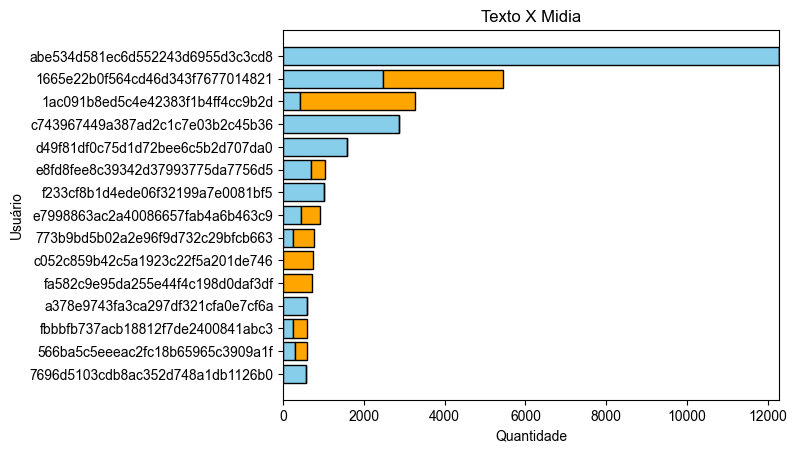

In [259]:
querry8 = conn.execute("""SELECT id_member_anonymous, COUNT(id_member_anonymous) AS Texto
                          FROM telegram3
                          WHERE message_type = 'Texto'
                          GROUP BY id_member_anonymous ORDER BY Texto DESC LIMIT 30
                        """).fetchdf()

querry9 = conn.execute("""SELECT id_member_anonymous, COUNT(id_member_anonymous) AS Midia
                          FROM telegram3
                          WHERE message_type != 'Texto'
                          GROUP BY id_member_anonymous ORDER BY Midia DESC LIMIT 30
                        """).fetchdf()


querry_merged = pd.merge(querry8, querry9, on='id_member_anonymous', how= 'outer').fillna(0)
querry_merged['total'] = querry_merged['Texto'] + querry_merged['Midia']
querry_merged = querry_merged.sort_values('total', ascending = True)
querry_merged = querry_merged.tail(15)
#querry_merged = querry_merged.sort_values('quantidade', ascending = True)
plt.barh(querry_merged['id_member_anonymous'], querry_merged['Texto'], color='skyblue', edgecolor = 'black')
plt.barh(querry_merged['id_member_anonymous'], querry_merged['Midia'], left = querry_merged['Texto'], color='orange', edgecolor = 'black')
plt.xlabel('Quantidade')
plt.ylabel('Usuário')
plt.title('Texto X Midia')
plt.show()


#### h.14) Os 30 usuários que mais compartilharam texto:

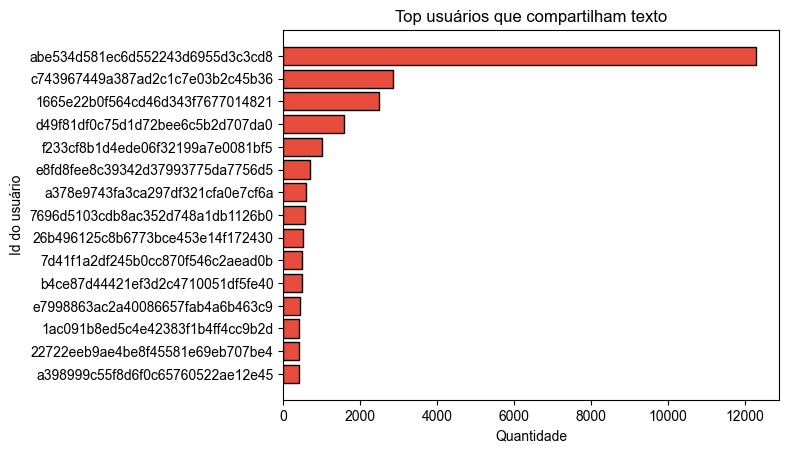

In [212]:
querry8 = querry8.sort_values('Texto', ascending = True)
querry_test = querry8.tail(15)

plt.barh(querry_test['id_member_anonymous'], querry_test['Texto'], color='#e74c3c', edgecolor = 'black')
plt.xlabel('Quantidade')
plt.ylabel('Id do usuário')
plt.title('Top usuários que compartilham texto')
plt.show()

#### h.15)  Os 30 usuários que mais compartilharam mídia:

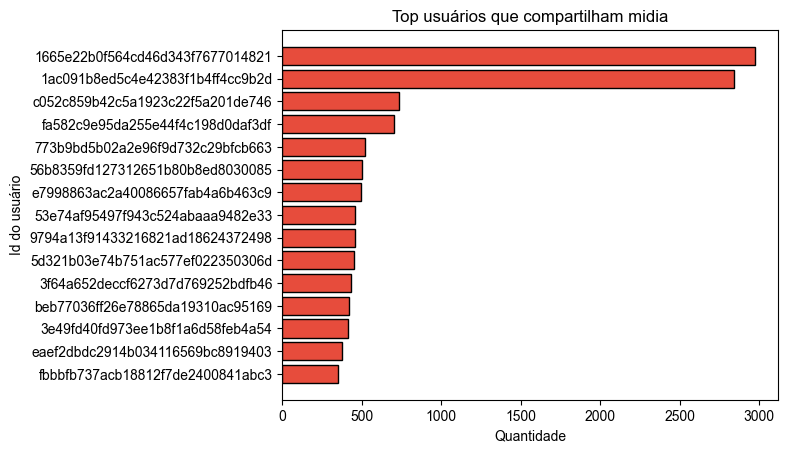

In [213]:
querry9 = querry9.sort_values('Midia', ascending = True)
querry_test = querry9.tail(15)

plt.barh(querry_test['id_member_anonymous'], querry_test['Midia'], color='#e74c3c', edgecolor = 'black')
plt.xlabel('Quantidade')
plt.ylabel('Id do usuário')
plt.title('Top usuários que compartilham midia')
plt.show()

#### h.16) As 30 mensagens mais compartilhadas: 

In [214]:
def truncate_text(x, max_length=60):
    if len(x) > max_length:
        return x[:max_length] + '...'
    else:
        return x

) missing from font(s) Arial.Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
C:\Users\iuri_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from font(s) Arial.
C:\Users\iuri_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from font(s) Arial.
C:\Users\iuri_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from font(s) Arial.
C:\User

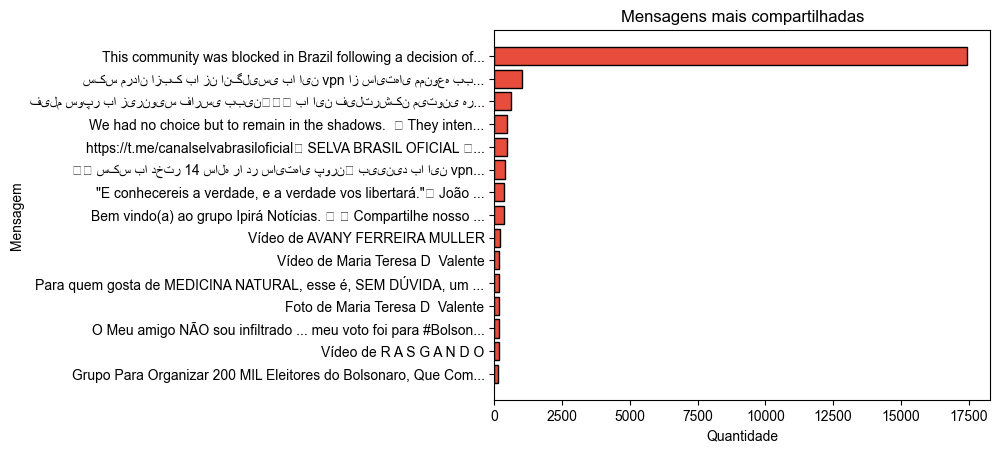

In [215]:
querry10 = conn.execute("""SELECT text_content_anonymous, COUNT(text_content_anonymous) AS quantidade
                          FROM telegram3
                          GROUP BY text_content_anonymous ORDER BY quantidade DESC LIMIT 15
                        """).fetchdf()

querry10['short_text'] = querry10['text_content_anonymous'].apply(truncate_text)
querry10 = querry10.sort_values('quantidade').head(15)
querry10['short_text'] = querry10['short_text'].str.replace('\n', ' ', regex=False)

plt.barh(querry10['short_text'], querry10['quantidade'], color='#e74c3c', edgecolor = 'black')

plt.xlabel('Quantidade')
plt.ylabel('Mensagem')
plt.title('Mensagens mais compartilhadas')
plt.show()


#### h.17)  As 30 mensagens mais compartilhadas em grupos diferentes: 

) missing from font(s) Arial.Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
C:\Users\iuri_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) Arial.


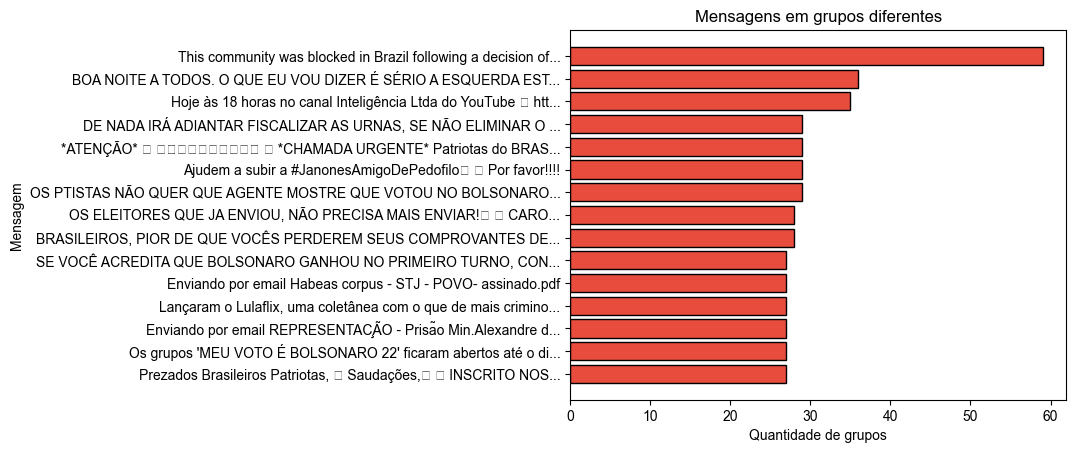

In [216]:
querry11 = conn.execute("""SELECT text_content_anonymous, COUNT(DISTINCT id_group_anonymous) AS quantidade
                          FROM telegram3
                          WHERE text_content_anonymous IS NOT NULL
                          GROUP BY text_content_anonymous ORDER BY quantidade DESC LIMIT 15
                        """).fetchdf()


#plt.subplots_adjust(left=0.3)  # Increase left margin to fit long y-axis labels

querry11['short_text'] = querry11['text_content_anonymous'].apply(truncate_text)
querry11['short_text'] = querry11['short_text'].str.replace('\n', ' ', regex=False)

querry11 = querry11.sort_values('quantidade')

plt.barh(querry11['short_text'], querry11['quantidade'], color='#e74c3c', edgecolor = 'black')

plt.xlabel('Quantidade de grupos')
plt.ylabel('Mensagem')
plt.title('Mensagens em grupos diferentes')
plt.show()

#### h.18) Mensagens  idênticas  compartilhadas  pelo  mesmo  usuário  (e  suas quantidades):

In [217]:
querry12 = conn.execute("""SELECT 
    id_member_anonymous,
    text_content_anonymous,
    COUNT(*) AS quantidade
    FROM telegram3
    WHERE text_content_anonymous IS NOT NULL AND id_member_anonymous IS NOT NULL
    GROUP BY id_member_anonymous, text_content_anonymous
    HAVING COUNT(*) > 1
    ORDER BY quantidade DESC
    """).fetchdf()

querry12

id_member_anonymous  \
0      f233cf8b1d4ede06f32199a7e0081bf5   
1      c743967449a387ad2c1c7e03b2c45b36   
2      7696d5103cdb8ac352d748a1db1126b0   
3      1665e22b0f564cd46d343f7677014821   
4      a398999c55f8d6f0c65760522ae12e45   
...                                 ...   
12296  5743e48fd70018c7fda32df0570ea2f0   
12297  e60d0e4d35dcbde13a0f972b790a206d   
12298  f4246de472e95124abee8b982608b02a   
12299  e8af199ddec596698ae0f033ddda23e2   
12300  ef0c5a79c7ba790f4c5c7cad0d7b3b33   

                                  text_content_anonymous  quantidade  
0      This community was blocked in Brazil following...         838  
1      This community was blocked in Brazil following...         532  
2      This community was blocked in Brazil following...         530  
3      Bem vindo(a) ao grupo Ipirá Notícias. \r\n\r\n...         357  
4      This community was blocked in Brazil following...         308  
...                                                  ...         ...  
12296  MINISTÉRIO DA DEFESA\r\n\r\n- Relatório vê pro...           2  
12297  ATENÇÃO 🚨🚨⚠️⚠️⚠️\r\n\r\nO RELATÓRIO TÁ CLARO! ...           2  
12298  GALERA FOCO NA MISSÃO PORRA!\r\nTA CHEIO DE IN...           2  
12299  https://www.instagram.com/reel/CkwtWJ1jpbO/?ig...           2  
12300  This community was blocked in Brazil following...           2  

[12301 rows x 3 columns]

#### h.19) Mensagens  idênticas  compartilhadas  pelo  mesmo  usuário  em  grupos distintos (e suas quantidades): 

In [218]:
querry13 = conn.execute("""SELECT 
    id_member_anonymous,
    text_content_anonymous,
    COUNT(DISTINCT id_group_anonymous) AS quantidade
    FROM telegram3
    WHERE text_content_anonymous IS NOT NULL AND id_member_anonymous IS NOT NULL
    GROUP BY id_member_anonymous, text_content_anonymous
    HAVING COUNT(DISTINCT id_group_anonymous) > 1
    ORDER BY quantidade DESC
    """).fetchdf()

querry13

id_member_anonymous  \
0     a7840e7844020149e197272748965862   
1     326d0a2f1bc5a1ede446fcf5dc31ff2e   
2     326d0a2f1bc5a1ede446fcf5dc31ff2e   
3     29dda76df3384c28a07e8bad1ee9ceed   
4     4e93f1d3c83fd6041314517363b14ed5   
...                                ...   
8304  3e56c89adedd461832a4a3b4ab9b776a   
8305  aff5a140bd3dc641ce331c6774f94d78   
8306  c052c859b42c5a1923c22f5a201de746   
8307  3e56c89adedd461832a4a3b4ab9b776a   
8308  abe534d581ec6d552243d6955d3c3cd8   

                                 text_content_anonymous  quantidade  
0     ALERTA\r\nESSE GRUPO FOI CRIADO PELA ESQUERDA ...          16  
1     💣💥((((( URGENTÍSSIMO )))))💥💣\r\nESSE GRUPO É U...          14  
2     💣💣💣💥💥🔰BOMBA BOMBA🔰💥💥💣💣💣\r\nVCS ESTÃO ACHANDO Q...          12  
3     BOA NOITE A TODOS. O QUE EU VOU DIZER É SÉRIO ...          11  
4     Pessoal não envie seus comprovantes de votação...          10  
...                                                 ...         ...  
8304  🇧🇷09/10 - PRESIDENTE BOLSONARO ao vivo agora E...           2  
8305  *Academia de Letras da Bahia é assaltada quatr...           2  
8306  Divulgue, é só copiar e colar nas redes sociai...           2  
8307  🚨ATENÇÃO URGENTE E IMPORTANTE \r\n⛔️GLOBOLIXO ...           2  
8308  Welcome, Luan Santiago\r\n\r\n🔸 [USER] — profe...           2  

[8309 rows x 3 columns]

#### h.21) As 30 mensagens mais positivas (distintas):

C:\Users\iuri_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.
C:\Users\iuri_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
C:\Users\iuri_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127385 (\N{SQUARED UP WITH EXCLAMATION MARK}) missing from font(s) Arial.
) missing from font(s) Arial.Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
C:\Users\iuri_\AppData\Local\Packages\PythonSof

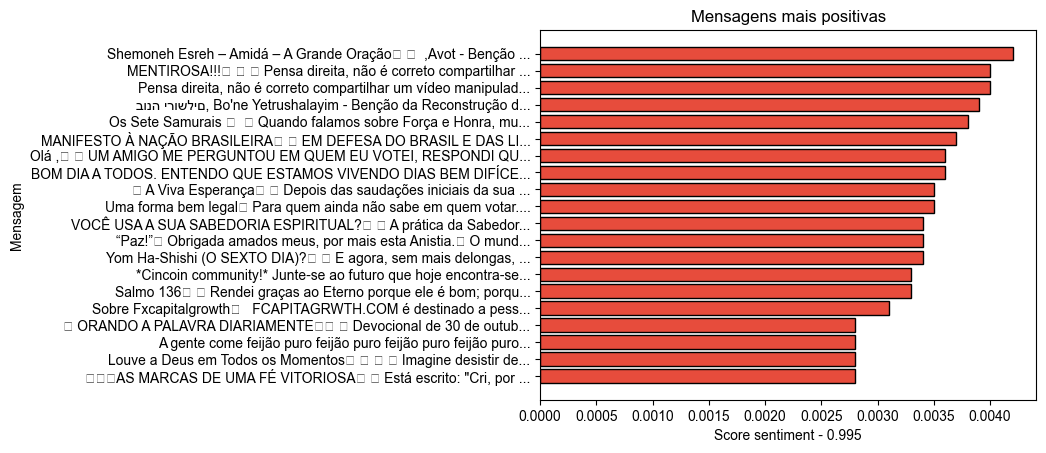

In [219]:
querry14 = conn.execute("""SELECT DISTINCT text_content_anonymous, score_sentiment
    FROM telegram3
    ORDER BY score_sentiment DESC
    LIMIT 20
    """).fetchdf()

querry14['score_sentiment'] = querry14['score_sentiment'] - 0.995
querry14['short_text'] = querry14['text_content_anonymous'].apply(truncate_text)
querry14['short_text'] = querry14['short_text'].str.replace('\n', ' ', regex=False)
querry14 = querry14.sort_values('score_sentiment')

plt.barh(querry14['short_text'], querry14['score_sentiment'], color='#e74c3c', edgecolor = 'black')
plt.xlabel('Score sentiment - 0.995')
plt.ylabel('Mensagem')
plt.title('Mensagens mais positivas')
plt.show()


#### h.22) As 30 mensagens mais negativas (distintas):

In [220]:
querry15 = conn.execute("""SELECT DISTINCT text_content_anonymous, score_sentiment
    FROM telegram3
    ORDER BY score_sentiment 
    LIMIT 30
    """).fetchdf()

querry15['text_content_anonymous'] = querry15['text_content_anonymous'].apply(truncate_text)
querry15['text_content_anonymous'] = querry15['text_content_anonymous'].str.replace('\n', ' ', regex=False)
#querry15 = querry15.sort_values('score_sentiment', ascending= False)

querry15.style\
.background_gradient(cmap='Reds_r', subset=['score_sentiment'])\
.set_properties(**{'text-align': 'left'})\
.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])



#### h.23) O usuário mais otimista:

In [221]:
querry16 = conn.execute("""SELECT 
    id_member_anonymous,
    SUM(score_sentiment) AS total_sentiment
FROM telegram3
WHERE score_sentiment IS NOT NULL AND id_member_anonymous IS NOT NULL
GROUP BY id_member_anonymous
ORDER BY total_sentiment DESC
                        LIMIT 1""").fetchdf()

querry16

id_member_anonymous  total_sentiment
0  1665e22b0f564cd46d343f7677014821        3105.8447

#### h.24) O usuário mais pessimista:

In [222]:
querry17 = conn.execute("""SELECT 
    id_member_anonymous,
    SUM(score_sentiment) AS total_sentiment
FROM telegram3
WHERE score_sentiment IS NOT NULL AND id_member_anonymous IS NOT NULL
GROUP BY id_member_anonymous
ORDER BY total_sentiment 
                        LIMIT 1""").fetchdf()

querry17

id_member_anonymous  total_sentiment
0  c743967449a387ad2c1c7e03b2c45b36        -333.2689

#### h.25) As 30 maiores mensagens:

In [223]:
querry18 = conn.execute("""SELECT 
    text_content_anonymous,
    LENGTH(text_content_anonymous) AS text_length
FROM telegram3
WHERE text_content_anonymous IS NOT NULL 
GROUP BY text_content_anonymous
ORDER BY text_length DESC 
                        LIMIT 30""").fetchdf()

querry18

text_content_anonymous  text_length
0   ⭐️13\r\n13 13 13\r\n13 13 13 13\r\n  13 13 13 ...         4309
1   881416 *๓๓รᏋ๓ค๔คห ฮเๆค.คฯเฤ 769ฬ๓๓*\r\n\r\n881...         4286
2   881416 *๓๓รᏋ๓ค๔คห ฮเๆค.คฯเฤ 769ฬ๓๓*\r\n\r\n881...         4283
3   881416 *๓๓รᏋ๓ค๔คห ฮเๆค.คฯเฤ 769ฬ๓๓*\r\n\r\n881...         4283
4   *Candidatos que apoiam o Presidente Jair Messi...         4266
5   DEPUTADO ESTADUAL (AM)\r\nDébora Menezes 22122...         4252
6   .:\r\n❤️🚩O VOTA VOTA \r\nE CONFIRMA \r\n13 É L...         4252
7   fatima:\r\nRepassem:\r\nCandidatos que apoiam ...         4250
8   ME CÚ NO PAU DO BOLSONARO \r\nME CÚ NO PAU DO ...         4243
9   *Candidatos que apoiam o Presidente Jair Messi...         4242
10  Repassem:\r\nCandidatos que apoiam o President...         4241
11  "MUITA GENTE DIZ QUE LULA ROUBOU O BRASIL MAS ...         4240
12  "Cipriani Downtown",,"001 212, 001 212(gym)","...         4236
13  PRIMEIRA PARTE RESET: PREPARAÇÃO DO NOVO SOFTW...         4233
14  DEPUTADO FEDERAL (MS)\r\nLoester ”Tio” Trutis ...         4230
15  BOLSONARO GAY BOLSONARO GAY \r\nBOLSONARO GAY ...         4223
16  ACABOU BOLSONARISTAS DE LERDOS \r\nACABOU BOLS...         4214
17  Intervenção é meu pau na tua mão\r\nIntervençã...         4214
18  ✅ AMAZONAS\r\n\r\nGOVERNADOR (AM)\r\nWilson Li...         4209
19  VOU FAZER MELHOR...,VOU TE DAR APNAS 100 MOTIV...         4208
20  REAGE BRASIL!\r\nGaste uns minutos e conheça u...         4206
21  "Heseltine, Rupert",,"212 (w), 212 (h), 0207 (...         4201
22  "Brooks, Miranda","New York","212, 917 Emergen...         4200
23  GOVERNADOR (AM)\r\nWilson Lima 44 (PSC)\r\n\r\...         4198
24  "Formby, Nicola","London","078, 0207","tooblon...         4196
25  DEPUTADO ESTADUAL (PA)\r\nRogério Barra 22222 ...         4195
26  [USER]⚠️⚠️DIVULGEM O MÁXIMO POSSÍVEL \r\n\r\nV...         4193
27  "Baumer, Lorenzo",,"033, 033 (l)","www.lorenzb...         4193
28  "Dunne, Philip & Dominice","London","0208,","N...         4191
29  Repitam comigo: Deus não existe \r\nRepitam co...         4190

#### h.26) As 30 menores mensagens:

In [224]:
querry19 = conn.execute("""SELECT 
    text_content_anonymous,
    LENGTH(text_content_anonymous) AS text_length
FROM telegram3
WHERE text_content_anonymous IS NOT NULL 
GROUP BY text_content_anonymous
ORDER BY text_length 
                        LIMIT 30""").fetchdf()

querry19

text_content_anonymous  text_length
0            Sou do R G S           12
1            *S I  N A L*           12
2          Aí aí aí ui ui           14
3         A bolsa fez o L           15
4         Foto de A Í D A           15
5         É esse o site ?           15
6        Meu voto é 22 🇧🇷           16
7        Vídeo de A Í D A           16
8        O que é isso 😡😡😡           16
9        Vídeo de 👊 💪 👍🤜🤛           16
10       É o fim do mundo           16
11       Foto de 🎀 VIVI 🎀           16
12       I have sent it ,           16
13      E não para por aí           17
14      Faz o L de Ladrão           17
15      Faz o L que passa           17
16      faz o L de ladrão           17
17      Eu já fui vote 22           17
18     Foto de Om Sai Ram           18
19     Bom dia a Todos !!           18
20     🌝😹 esses 13 do krl           18
21     já esta em 1 lugar           18
22     O meu voto é 22 🇧🇷           18
23     Aí o ÓDIO DO BEM!!           18
24     O Bragil e lula la           18
25     Olha de quem é o L           18
26     entre 3 a 10 reais           18
27     Foto de MVCA & RCS           18
28     Carol Dias é 22 🇧🇷           18
29     A UM PASSO DE GALO           18

#### h.27) O dia em que foi publicado a maior quantidade de mensagens:

In [225]:
querry20 = conn.execute("""SELECT 
    CAST(date_message AS DATE) AS data,
    COUNT(id_message) AS quantidade
FROM telegram3
GROUP BY data
ORDER BY quantidade DESC LIMIT 1""").fetchdf()

querry20

data  quantidade
0 2022-11-01       18621

#### h.28) As mensagens que possuem as palavras “FACÇÃO” e “CRIMINOSA”:

In [ ]:
querry21 = conn.execute(""" SELECT text_content_anonymous
                            FROM telegram3
                            WHERE text_content_anonymous ILIKE '%CRIMINOSA%' AND
                            text_content_anonymous ILIKE '%FACÇÃO%'
                        """).fetchdf()

querry21

text_content_anonymous
0    Pensem!!!!!!'Se Houve fraude  ,Nada foi feito ...
1    Se depois de ler esse resumo do Plano do PT, v...
2    Se depois de ler esse resumo do Plano do PT, v...
3    É  exatamente isso que a facção criminosa CHAM...
4    Esperar o que dessa eleição  com bandidos alia...
..                                                 ...
133  😣🤯🤐 Alexandre de Moraes (Secretário-Geral do P...
134  😣🤯🤐 Alexandre de Moraes (Secretário-Geral do P...
135  😣🤯🤐 Alexandre de Moraes (Secretário-Geral do P...
136  Agressões covardes é termos uma facção crimino...
137  Justiça solta advogadas do PCC acusadas de par...

[138 rows x 1 columns]

#### h.29) Quantidade de mensagens por dia e hora:

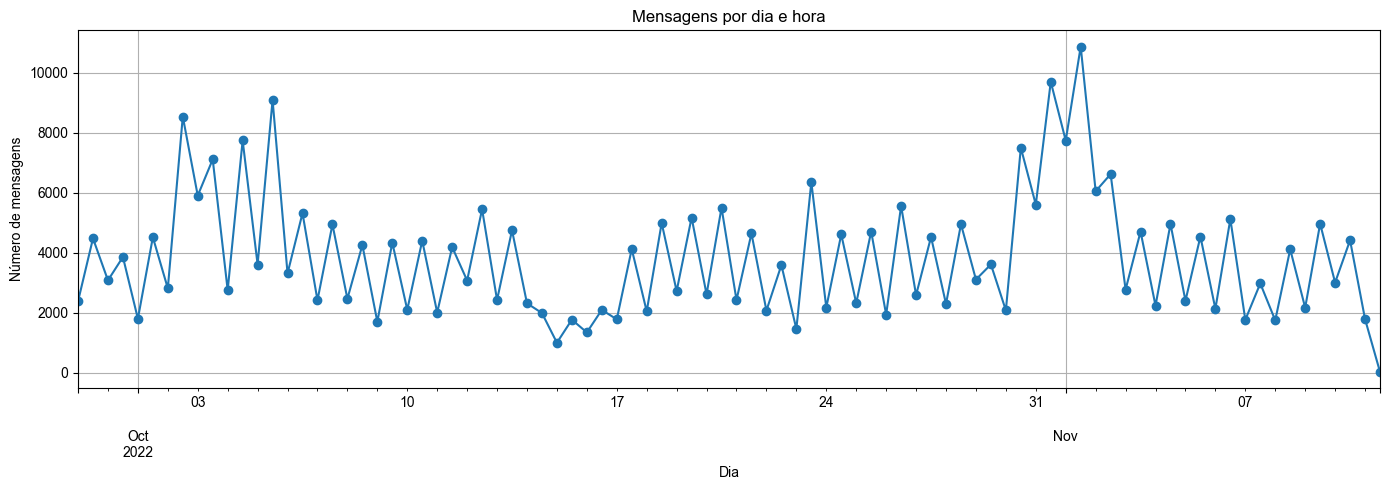

In [227]:

arquivo['date_message'] = pd.to_datetime(arquivo['date_message'])  # Ensure datetime format
arquivo1 = arquivo
arquivo1 = arquivo1.set_index('date_message')
message_series = arquivo1.resample('12h').size()
plt.figure(figsize=(14, 5))
message_series.plot(marker = 'o')
plt.title("Mensagens por dia e hora")

plt.xlabel("Dia")

plt.ylabel("Número de mensagens")
plt.grid(True)
plt.tight_layout()
plt.show()



#### h.30) Quantidade de mensagens por hora:

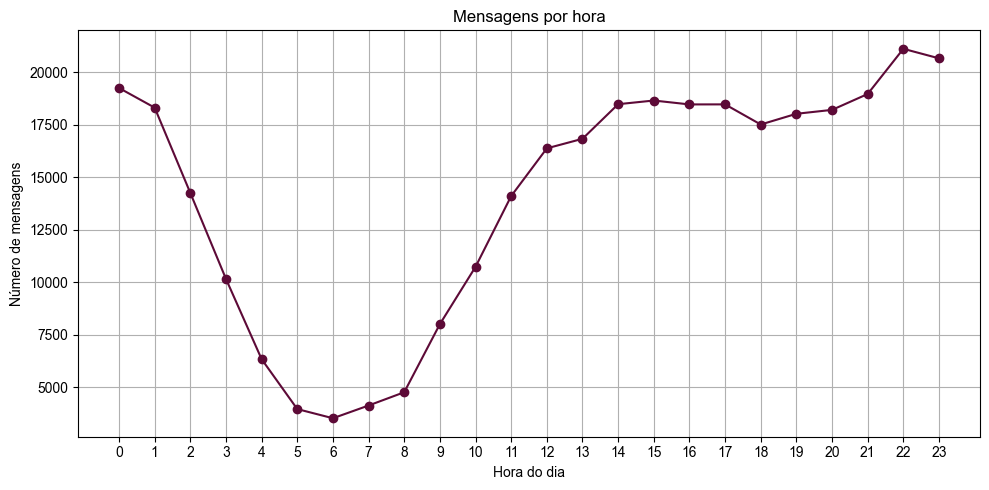

In [228]:
arquivo['hour'] = arquivo['date_message'].dt.hour  # 0–23
messages_per_hour = arquivo.groupby('hour').size()
plt.figure(figsize=(10, 5))
messages_per_hour.plot(kind='line', color="#5d0a37", marker = 'o')
plt.xticks(range(0,24))
plt.xlabel("Hora do dia")
plt.ylabel("Número de mensagens")
plt.title("Mensagens por hora")
plt.grid()
plt.tight_layout()
plt.show()

#### h.31)  A nuvem de palavras referente às mensagens de texto (após a remoção de stop words): 

In [ ]:
! pip install wordcloud nltk

In [37]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
# Use NLTK's English stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iuri_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

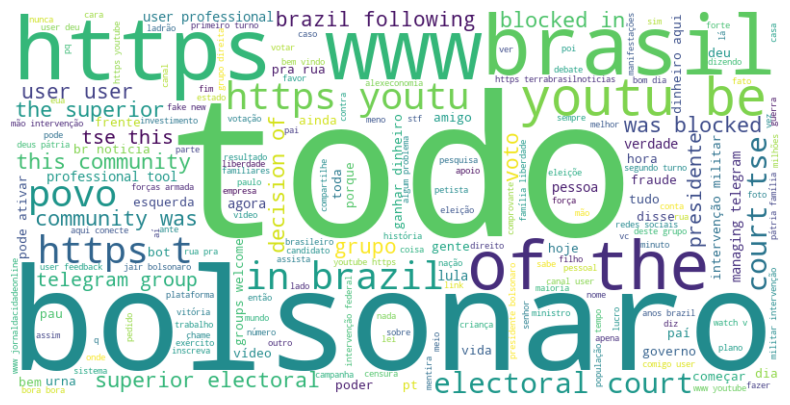

In [231]:
stopwords_nltk = set(stopwords.words('portuguese'))

# Combine text
text = ' '.join(arquivo['text_content_anonymous'].dropna().astype(str)).lower()

# Generate word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords_nltk,
    max_words=200
).generate(text)

# Display
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



#### h.32) A  rede  interativa  das  palavras  referente  às  mensagens  de  texto  (após  a remoção de stop words):

In [ ]:
! pip install networkx pyvis

In [45]:
from nltk.tokenize import word_tokenize
import networkx as nx
from pyvis.network import Network
from collections import Counter
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\iuri_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

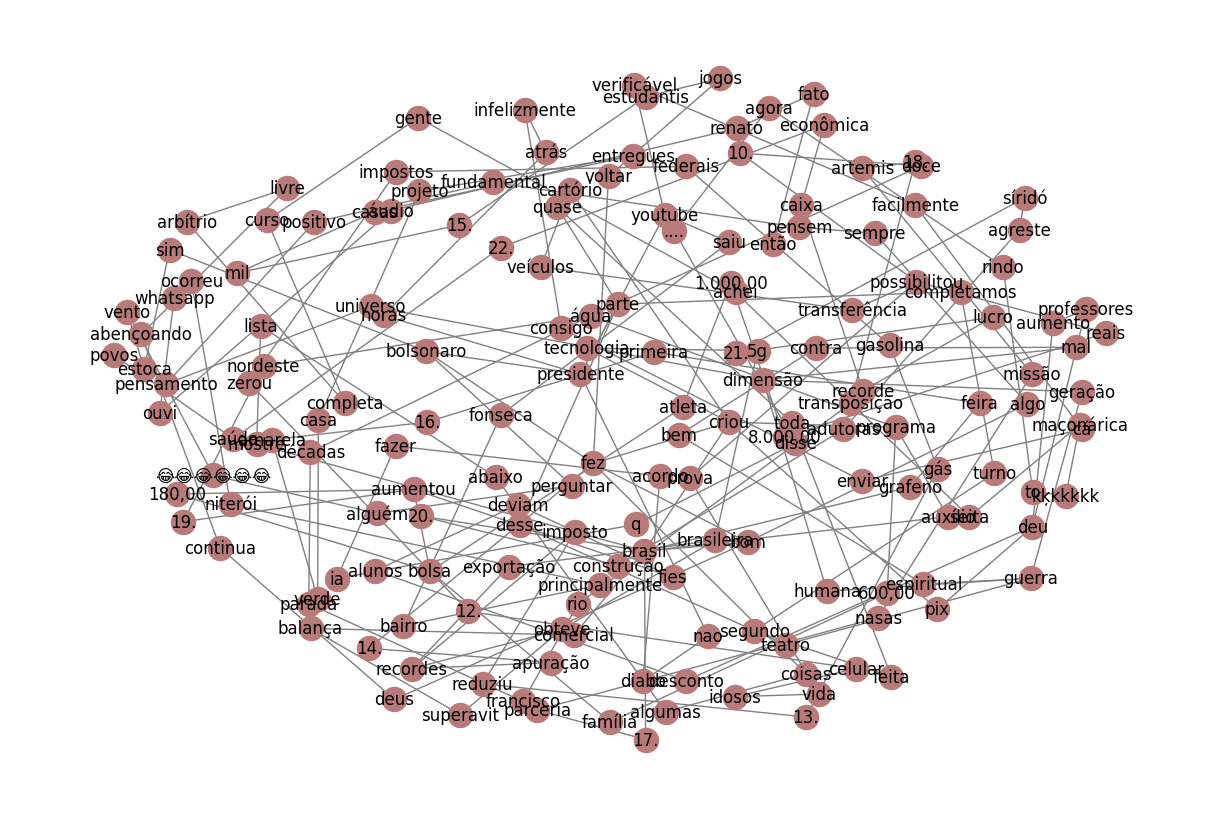

In [50]:
textos = arquivo['text_content_anonymous'].dropna().astype(str).tolist()
tokens = word_tokenize(' '.join(textos).lower())

stop_words = set(stopwords.words('portuguese'))
stop_words.update(['.', ',', '!', '?', ':', ';','-','*','%','_' , '(', ')', '[', ']', '{', '}', '...', '1.', '2.', '3.', '4.', '5.', '6.', '7.', '8.', '9.'] )

tokens = [token for token in tokens if token not in stop_words and not token.isdigit()]

tokens = tokens[:200]

edges = []

for i in range(len(tokens) -1):
    edges.append((tokens[i], tokens[i + 1]))

edge_counts = Counter(edges)

G = nx.Graph()
for edge, weight in edge_counts.items():
    G.add_edge(edge[0], edge[1], weight=weight)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_color="#b97a7a", edge_color='gray')
plt.show()

#### h.33) Proporção de mensagens com e sem URL:

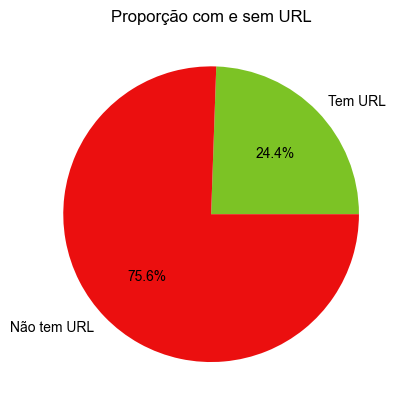

In [ ]:
querry22 = conn.execute(""" SELECT COUNT(*) as has_url
                            FROM telegram3
                            WHERE has_media_url = True
                        """).fetchdf()
querry23 = conn.execute(""" SELECT COUNT(*) as has_not_url
                            FROM telegram3
                            WHERE has_media_url = False
                        """).fetchdf()

querry_united = pd.concat([querry22,querry23], axis = 1)

plt.pie(querry_united.iloc[0], labels = ['Tem URL','Não tem URL'],colors = ["#7cc325","#eb0f0f"],autopct='%1.1f%%')
plt.title('Proporção com e sem URL')
plt.show()

#### h.34) Proporção de desinformação:

              desinformacao  quantidade
0                    Neutro       18593
1      Contem desinformacao       32410
2  Nao contem desinformacao      116221


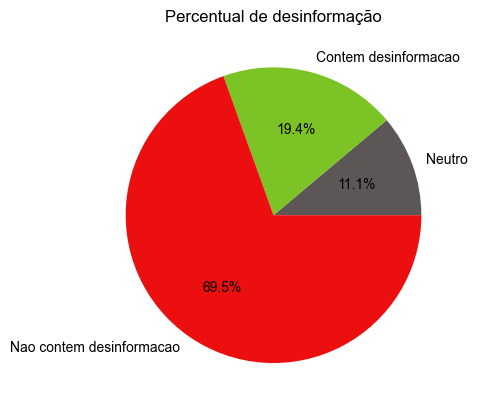

In [ ]:
querry24 = conn.execute(""" SELECT 
                        CASE 
                            WHEN score_misinformation > 0.6 THEN 'Contem desinformacao'
                            WHEN score_misinformation < 0.4 THEN 'Nao contem desinformacao'
                            ELSE 'Neutro'
                        END AS desinformacao, COUNT(*) AS quantidade
                            FROM telegram3
                            WHERE score_misinformation IS NOT NULL
                            GROUP BY desinformacao
                            ORDER BY quantidade       
                        """).fetchdf()
print(querry24)

plt.pie(querry24['quantidade'],labels= querry24['desinformacao'],colors = ["#332A2ACA", "#7cc325","#eb0f0f"],autopct='%1.1f%%')
plt.title('Percentual de desinformação')
plt.show()

#### h.35) Proporção de mensagens contendo mídia e desinformação:

              desinformacao  has_media  quantidade
0                    Neutro       True        6336
1      Contem desinformacao       True       10135
2                    Neutro      False       12257
3      Contem desinformacao      False       22275
4  Nao contem desinformacao       True       52012
5  Nao contem desinformacao      False       64209


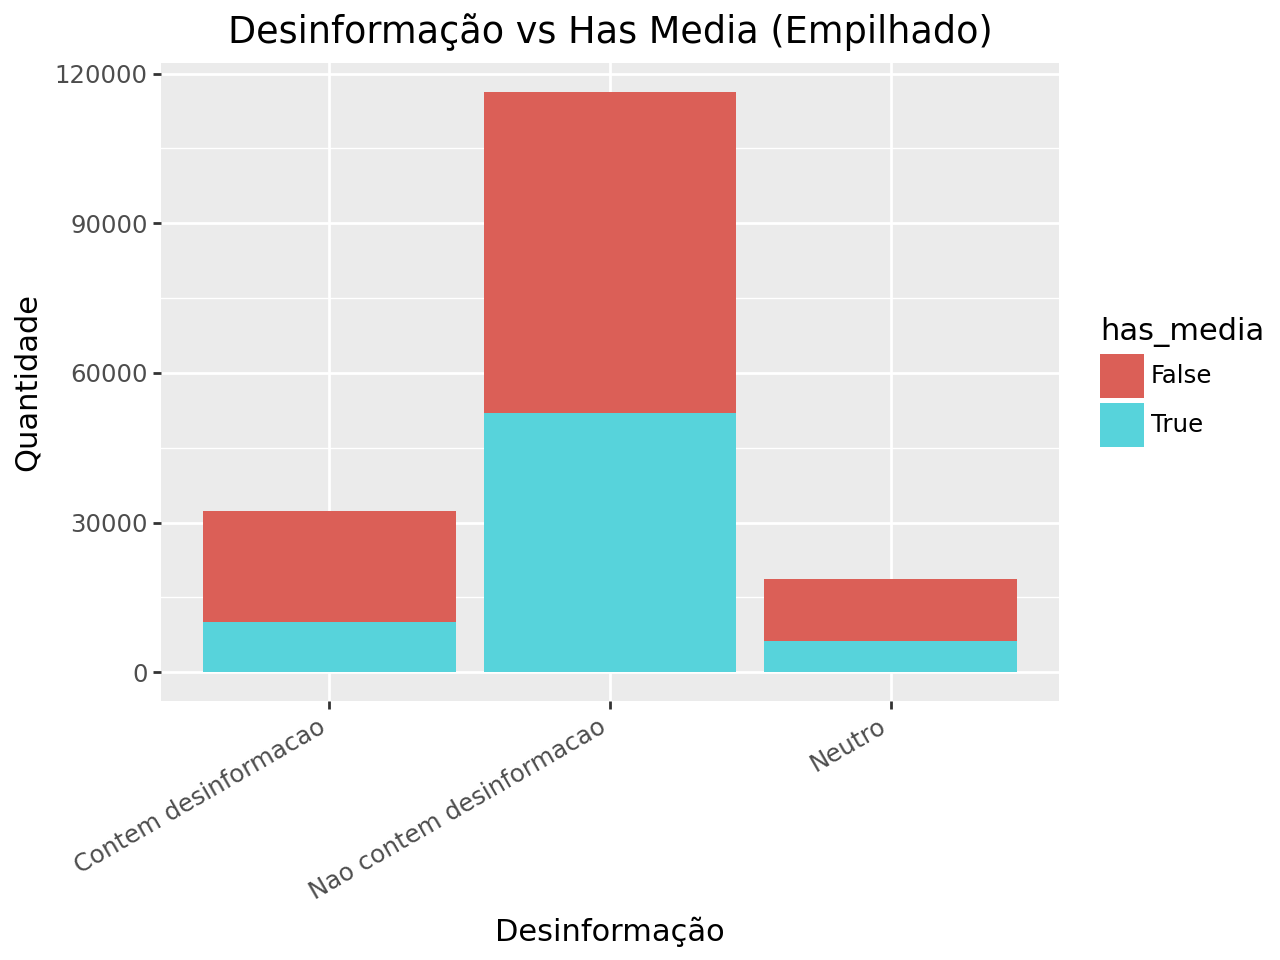

In [ ]:
querry25 = conn.execute(""" SELECT 
                        CASE 
                            WHEN score_misinformation > 0.6 THEN 'Contem desinformacao'
                            WHEN score_misinformation < 0.4 THEN 'Nao contem desinformacao'
                            ELSE 'Neutro'
                        END AS desinformacao, has_media, COUNT(*) AS quantidade
                            FROM telegram3
                            WHERE score_misinformation IS NOT NULL
                            GROUP BY desinformacao, has_media
                            ORDER BY quantidade       
                        """).fetchdf()

print(querry25)
(
    ggplot(querry25, aes(x='desinformacao', y='quantidade', fill='has_media')) +
    geom_bar(stat='identity', position='stack') +
    labs(title='Desinformação vs Has Media (Empilhado)',
         x='Desinformação', y='Quantidade') +
    theme(axis_text_x=element_text(rotation=30, hjust=1))
)


#### h.36) Distribuição de mensagens por score de desinformação:

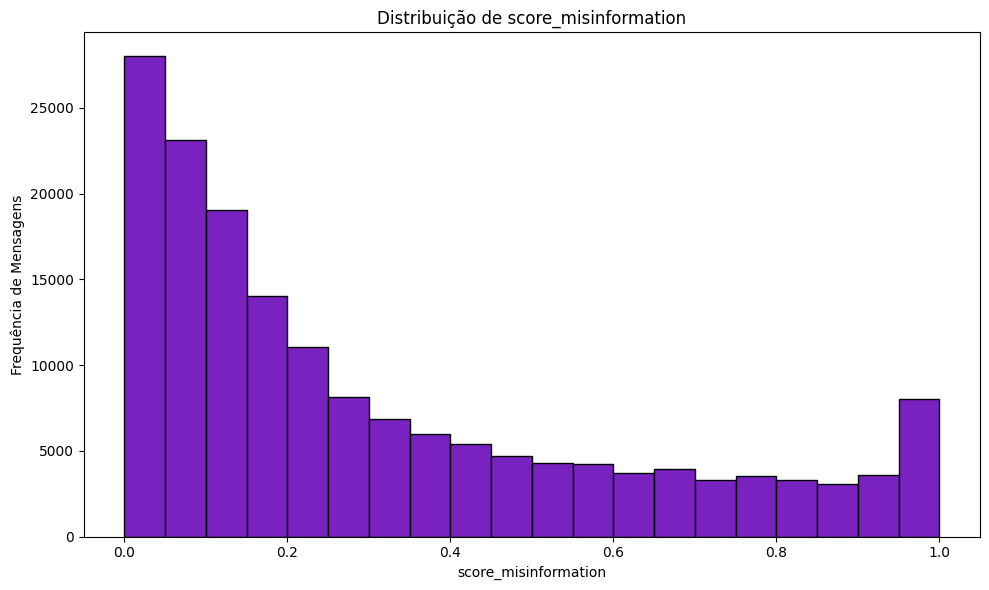

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(arquivo['score_misinformation'], bins = 20,color="#7922c0", edgecolor='black')
plt.title('Distribuição de score_misinformation')
plt.xlabel('score_misinformation')
plt.ylabel('Frequência de Mensagens')
plt.tight_layout()
plt.show()


#### h.37) Proporção de sentimentos:

  sentimento  quantidade
0     Neutro       81215
1   Negativo      125979
2   Positivo      132045


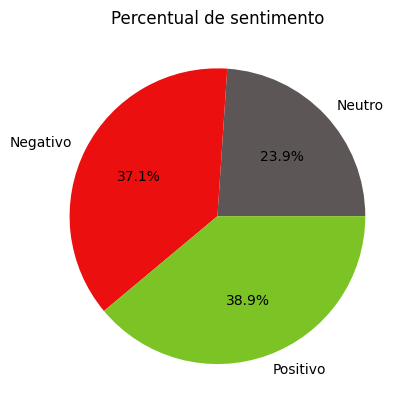

In [22]:
querry26 = conn.execute(""" SELECT 
                        CASE 
                            WHEN score_sentiment > 0.05 THEN 'Positivo'
                            WHEN score_sentiment < -0.05 THEN 'Negativo'
                            ELSE 'Neutro'
                        END AS sentimento, COUNT(*) AS quantidade
                            FROM telegram3
                            WHERE score_sentiment IS NOT NULL
                            GROUP BY sentimento
                            ORDER BY quantidade       
                        """).fetchdf()
print(querry26)

plt.pie(querry26['quantidade'],labels= querry26['sentimento'],colors = ["#332A2ACA","#eb0f0f","#7cc325"],autopct='%1.1f%%')
plt.title('Percentual de sentimento')
plt.show()

#### h.38) Distribuição de mensagens por score de sentimentos:

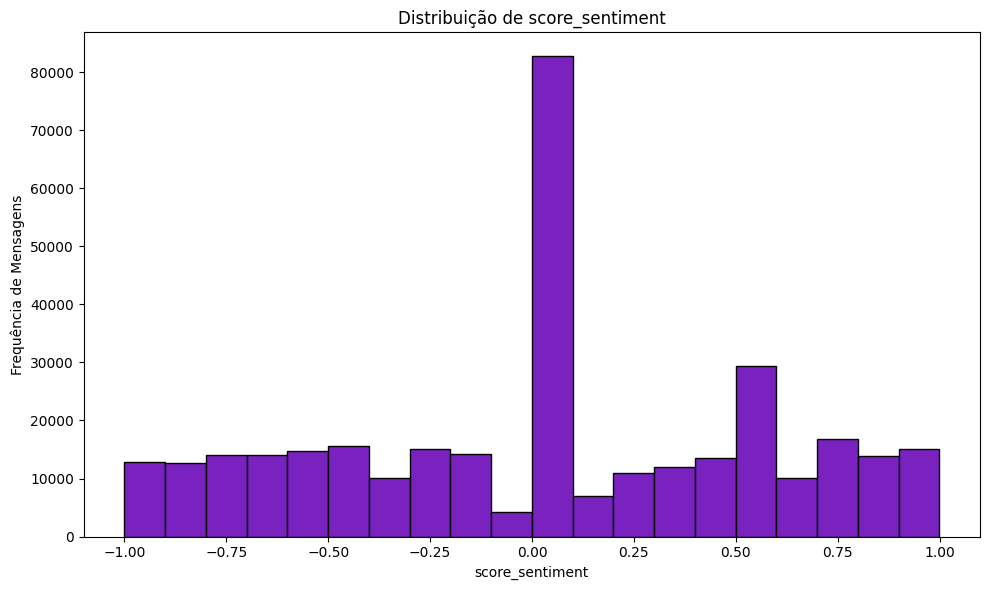

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(arquivo['score_sentiment'], bins = 20,color="#7922c0", edgecolor='black')
plt.title('Distribuição de score_sentiment')
plt.xlabel('score_sentiment')
plt.ylabel('Frequência de Mensagens')
plt.tight_layout()
plt.show()

#### h.39) Proporção entre mensagens virais e não virais:

In [25]:
arquivo['viral'] = (arquivo.duplicated(subset='text_content_anonymous', keep = False) & arquivo['text_content_anonymous'].notna()).astype(int)
conn.register('telegram3',arquivo)


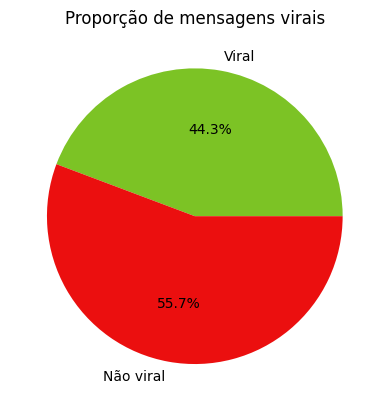

In [34]:
querry27 = conn.execute(""" SELECT COUNT(*) AS viral
                            FROM telegram3
                            WHERE viral = 1
                        """).fetchdf()
querry28 = conn.execute(""" SELECT COUNT(*) AS nao_viral
                            FROM telegram3
                            WHERE viral = 0
                        """).fetchdf()
querry_united = pd.concat([querry27, querry28], axis = 1)

plt.pie(querry_united.iloc[0], labels = ['Viral','Não viral'],colors = ["#7cc325","#eb0f0f"],autopct='%1.1f%%')
plt.title('Proporção de mensagens virais')
plt.show()